In [1]:
import os, sys
sys.path.insert(0, os.path.abspath(".."))

In [2]:
import pandas as pd
import boto3
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style("whitegrid")

## Importamos la información

In [4]:
session = boto3.session.Session()
s3client = session.client('s3')

In [5]:
response = s3client.get_object(Bucket='inai-summerofdata', Key='mlpreproc/pickles/df.pkl')

body = response['Body'].read()
df = pickle.loads(body)

Quitamos nueva lista de stopwords.

In [6]:
banned = ['federativo', 'juicio', 'materia', 'proveedor', 'activar', 'cargar', 'amparar', 'transparencia', 'poblacion', 'favor', 
          'directo', 'facturar','federal', 'fecho', 'registrar', 'emplear', 'campar', 'tribunal', 'atencion',
          'pagar', 'instituto', 'reportar', 'publicos', 'licitacion', 'honorario', 'encontrar', 'entidad',
          'acceso', 'derecho', 'concepto', 'recurso', 'beneficiario', 'electoral', 'esperar', 'expedientar', 'basar',
          'documento', 'adquirir', 'presentar', 'clavar', 'amparar', 'personal', 'solucion', 'adjuntar', 'adjunto',
          'respuesta','solicitud','solicitar', 'solicito', 'solicitamos', 'solicite', 'informacion', 'mexico', 'titular', 
          'titulo', 'copiar', 'copie', 'copiamos', 'dependencia', 'municipio', 'tramitar', 'contratar', 
          'contrato', 'servicio', 'tramitar', 'tramite', 'proyectar', 'proyectamos', 'proyecte', 'proyeccion', 
          'nacional', 'administrativo', 'presupuestar', 'presupuesto', 'correo', 'pemex', 'programar', 'programa',
          'programacion', 'empresa', 'personar', 'edad', 'unidad', 'soldar', 'circuito']

In [7]:
f = lambda x: ' '.join([item for item in x.split() if item not in banned])
df['descripcionsolicitud_lemma'] = df['descripcionsolicitud_lemma'].apply(f)

In [8]:
df['solicitud_lemma_longitud'] = df['descripcionsolicitud_lemma'].str.len()

In [9]:
df.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud,descripcionsolicitud_lemma,codigo_calidad_respuesta_real,solicitud_lemma_longitud
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,768,comportamiento historico tipicos comprender es...,0,418
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,548,usar flujo efectivo pozo tipico aguar fria ela...,0,289
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,269,proporcionar magnetico relacion ocupar articul...,1,127
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,269,proporcionar magnetico relacion ocupar articul...,0,127
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,zip,4.0,None,sin respuesta,satisfactoria,no respondida,398,proporcionar magnetico relacion ocupar articul...,1,172


In [10]:
df['anosolicitud'] = pd.DatetimeIndex(df['fechasolicitud']).year

In [11]:
df.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud,descripcionsolicitud_lemma,codigo_calidad_respuesta_real,solicitud_lemma_longitud,anosolicitud
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,768,comportamiento historico tipicos comprender es...,0,418,2012
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,548,usar flujo efectivo pozo tipico aguar fria ela...,0,289,2012
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,269,proporcionar magnetico relacion ocupar articul...,1,127,2012
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,269,proporcionar magnetico relacion ocupar articul...,0,127,2012
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,4.0,None,sin respuesta,satisfactoria,no respondida,398,proporcionar magnetico relacion ocupar articul...,1,172,2012


In [12]:
grouped = df.groupby('anosolicitud').count()[['folio']]
grouped = grouped.sort_values('anosolicitud', ascending=False)
grouped.style.format("{:,}")

,folio
anosolicitud,
2019,"229,847"
2018,"189,462"
2017,"201,067"
2016,"136,660"
2015,"113,851"
2014,"108,826"
2013,"103,296"
2012,"88,688"


Utilizaremos solo el año 2012 para probar los modelos.

In [13]:
filtro = df['anosolicitud'] == 2012
df = df[filtro]

Agregamos dependencias.

In [14]:
def FixDependencia(df_dependencia):
    df_dependencia["dependencia_clean"] = df_dependencia["dependencia"]
    
    # SINDICATOS NACIONALES DE TRABAJADORES - Por su NO dependencia directa de las dependencias, se hace al inicio.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SINDICATO NACIONAL DE TRABAJADORES', case=False, na=None), "dependencia_clean"] = 'sindicato nacional de trabajadores'
    # UNIÓN NACIONAL DE TRABAJADORES DE LA INDUSTRIA ALIMENTICIA  REFRESQUERA  TURÍSTICA  HOTELERA  GASTRONÓMICA  SIMILARES Y CONEXOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNIÓN NACIONAL DE TRABAJADORES DE LA INDUSTRIA ALIMENTICIA  REFRESQUERA  TURÍSTICA  HOTELERA  GASTRONÓMICA  SIMILARES Y CONEXOS', case=False, na=None), "dependencia_clean"] = 'sindicato nacional de trabajadores'
    # ORDEN DE CAPITANES Y PILOTOS NAVALES DE LA REPÚBLICA MEXICANA  SIMILARES Y CONEXOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ORDEN DE CAPITANES Y PILOTOS NAVALES DE LA REPÚBLICA MEXICANA  SIMILARES Y CONEXOS', case=False, na=None), "dependencia_clean"] = 'sindicato nacional de trabajadores'
    
    # Administradoras portuarias - 11736 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ADMINISTRACIÓN PORTUARIA INTEGRAL DE', case=False, na=None), "dependencia_clean"] = 'administracion portuaria integral'
    
    
    ## Administración pública Federal
    # CONSEJERÍA JURÍDICA DEL EJECUTIVO FEDERAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJERÍA JURÍDICA DEL EJECUTIVO FEDERAL', case=False, na=None), "dependencia_clean"] = 'administracion publica federal'
    # CONEVAL - CONSEJO NACIONAL DE EVALUACIÓN DE LA POLÍTICA DE DESARROLLO SOCIAL- 988 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJO NACIONAL DE EVALUACIÓN DE LA POLÍTICA DE DESARROLLO SOCIAL', case=False, na=None), "dependencia_clean"] = 'administracion publica federal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONEVAL', case=False, na=None), "dependencia_clean"] = 'administracion publica federal'
    # INSTITUTO NACIONAL DE ELECTRICIDAD Y ENERGÍAS LIMPIAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ELECTRICIDAD Y ENERGÍAS LIMPIAS', case=False, na=None), "dependencia_clean"] = 'administracion publica federal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INEEL', case=False, na=None), "dependencia_clean"] = 'administracion publica federal'
    
    # ASA 5305 renglones, SCT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('AEROPUERTOS Y SERVICIOS AUXILIARES', case=False, na=None), "dependencia_clean"] = 'aeropuertos y servicios auxiliares (ASA)'
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "ASA-MANDATO PARA EL PAGO DE COMPROMISOS DEL PABELLÓN AEROESPACIAL CFE-SCT-ASA", "dependencia_clean"] = "aeropuertos y servicios auxiliares (ASA)"
    
    # BANXICO - 5,108 registros
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANCO DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'banxico'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANXICO', case=False, na=None), "dependencia_clean"] = 'banxico'
    # FONDO MEXICANO DEL PETRÓLEO PARA LA ESTABILIZACIÓN Y EL DESARROLLO
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MEXICANO DEL PETRÓLEO PARA LA ESTABILIZACIÓN Y EL DESARROLLO', case=False, na=None), "dependencia_clean"] = 'banxico'
    
    ## ***** CÁMARA DE DIPUTADOS *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CÁMARA DE DIPUTADOS', case=False, na=None), "dependencia_clean"] = 'camara de dipuados'
    
    # CAPUFE - 6,167 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CAMINOS Y PUENTES FEDERALES', case=False, na=None), "dependencia_clean"] = 'capufe'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CAPUFE', case=False, na=None), "dependencia_clean"] = 'capufe'
    # F/11025590
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('F/11025590', case=False, na=None), "dependencia_clean"] = 'capufe'
    # F/21935-2
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('F/21935-2', case=False, na=None), "dependencia_clean"] = 'capufe'
    # FIDEICOMISO PARA LA CONSTRUCCIÓN  EXPLOTACIÓN Y CONSERVACIÓN DEL TRAMO CARRETERO ATLACOMULCO-MARAVATIO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA CONSTRUCCIÓN  EXPLOTACIÓN Y CONSERVACIÓN DEL TRAMO CARRETERO ATLACOMULCO-MARAVATIO', case=False, na=None), "dependencia_clean"] = 'capufe'
    # FARAC - FIDEICOMISO 2165-8 FONDO PARA LIQUIDACIÓN DE TRABAJADORES DE LA RED FONADIN (ANTES FARAC).
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO 2165-8 FONDO PARA LIQUIDACIÓN DE TRABAJADORES DE LA RED FONADIN', case=False, na=None), "dependencia_clean"] = 'capufe'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    # F/1516 - FIDEICOMISO F/1516 ATM (ANTES F/639-00-5 TIJUANA-TECATE))
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('F/1516', case=False, na=None), "dependencia_clean"] = 'capufe'
    # FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN Y FUENTE DE PAGO NÚMERO CIB/2064
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN Y FUENTE DE PAGO NÚMERO CIB/2064', case=False, na=None), "dependencia_clean"] = 'capufe'
    # FIDEICOMISO MEXICANA DE TÉCNICOS DE AUTOPISTAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO MEXICANA DE TÉCNICOS DE AUTOPISTAS', case=False, na=None), "dependencia_clean"] = 'capufe'
    # FIDEICOMISO NO. 2103.- CUAUHTÉMOC - OSIRIS  - EN ADELANTE Fideicomiso F/745293
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO NO. 2103.- CUAUHTÉMOC - OSIRIS', case=False, na=None), "dependencia_clean"] = 'capufe'
    # SM940243 GÓMEZ PALACIO-CUENCAMÉ-YERBANÍS (CARRETERA TORREÓN-CUENCAMÉ-DURANGO) MANDATO 4861-5
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SM940243 GÓMEZ PALACIO-CUENCAMÉ-YERBANÍS', case=False, na=None), "dependencia_clean"] = 'capufe'
    # SAN MARTÍN TEXMELUCAN-TLAXCALA-EL MOLINITO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SAN MARTÍN TEXMELUCAN-TLAXCALA-EL MOLINITO', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARAC', case=False, na=None), "dependencia_clean"] = 'capufe'
    
    
    
    # CEAV - 5,338 registros
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN EJECUTIVA DE ATENCIÓN A VÍCTIMAS', case=False, na=None), "dependencia_clean"] = 'ceav'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CEAV', case=False, na=None), "dependencia_clean"] = 'ceav'  
    # CEAV - FONDO DE AYUDA  ASISTENCIA Y REPARACIÓN INTEGRAL
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE AYUDA  ASISTENCIA Y REPARACIÓN INTEGRAL', case=False, na=None), "dependencia_clean"] = 'ceav'
    
    
    ##  ***** CFE *****
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "C. G. CERRO PRIETO IV", "dependencia_clean"] = "cfe"
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('C. T. CHIHUAHUA', case=False, na=None), "dependencia_clean"] = 'cfe'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CFE', case=False, na=None), "dependencia_clean"] = 'cfe'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN FEDERAL DE ELECTRICIDAD', case=False, na=None), "dependencia_clean"] = 'cfe'
    # FIDEICOMISO PARA LA CONSTITUCIÓN DE UN FONDO REVOLVENTE DE FINANCIAMIENTO PARA EL PROGRAMA DE AISLAMIENTO TÉRMICO DE LA VIVIENDA EN EL VALLE DE MEXICALI B.C. (FIPATERM MEXICALI).
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA CONSTITUCIÓN DE UN FONDO REVOLVENTE DE FINANCIAMIENTO PARA EL PROGRAMA DE AISLAMIENTO TÉRMICO DE LA VIVIENDA EN EL VALLE', case=False, na=None), "dependencia_clean"] = 'cfe'
    # FIDEICOMISO DE ADMINISTRACIÓN Y TRASLATIVO DE DOMINIO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE ADMINISTRACIÓN Y TRASLATIVO DE DOMINIO', case=False, na=None), "dependencia_clean"] = 'cfe'
    # FIDEICOMISO PARA EL AHORRO DE ENERGÍA ELÉCTRICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL AHORRO DE ENERGÍA ELÉCTRICA', case=False, na=None), "dependencia_clean"] = 'cfe'
    # FIDEICOMISO DE ADMINISTRACIÓN DE GASTOS PREVIOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE ADMINISTRACIÓN DE GASTOS PREVIOS', case=False, na=None), "dependencia_clean"] = 'cfe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CFE', case=False, na=None), "dependencia_clean"] = 'cfe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CFE', case=False, na=None), "dependencia_clean"] = 'cfe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CFE', case=False, na=None), "dependencia_clean"] = 'cfe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CFE', case=False, na=None), "dependencia_clean"] = 'cfe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CFE', case=False, na=None), "dependencia_clean"] = 'cfe'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CFE', case=False, na=None), "dependencia_clean"] = 'cfe'
    
    # COFEPRIS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN FEDERAL PARA LA PROTECCIÓN CONTRA RIESGOS SANITARIOS', case=False, na=None), "dependencia_clean"] = 'cofepris'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COFEPRIS', case=False, na=None), "dependencia_clean"] = 'cofepris'
    
    
    ## ***** CONACYT ***** CONSEJO NACIONAL DE CIENCIA Y TECNOLOGÍA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJO NACIONAL DE CIENCIA Y TECNOLOGÍA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE COOPERACIÓN INTERNACIONAL EN CIENCIA Y TECNOLOGÍA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONACYT', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "FONDO SECTORIAL DE INVESTIGACIÓN Y DESARROLLO EN CIENCIAS NAVALES", "dependencia_clean"] = "conacyt"
    # CIAD - CENTRO DE INVESTIGACIÓN EN ALIMENTACIÓN Y DESARROLLO  A.C. (CIAD) - 1003 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN EN ALIMENTACIÓN Y DESARROLLO', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIAD', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIATEJ - CENTRO DE INVESTIGACIÓN Y ASISTENCIA EN TECNOLOGÍA Y DISEÑO DEL ESTADO DE JALISCO - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN Y ASISTENCIA EN TECNOLOGÍA Y DISEÑO DEL ESTADO DE JALISCO', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIATEJ', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIATEJ - FIDEICOMISO DE INVESTIGACIÓN CIENTÍFICA Y DE DESARROLLO TECNOLÓGICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE INVESTIGACIÓN CIENTÍFICA Y DE DESARROLLO TECNOLÓGICO', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIBNOR
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIONES BIOLÓGICAS DEL NOROESTE', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIBNOR', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIESAS - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIONES Y ESTUDIOS SUPERIORES EN ANTROPOLOGÍA SOCIAL', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIESAS', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CICESE - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN CIENTÍFICA Y', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CICESE', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIGGET -  CENTRO DE INVESTIGACIÓN EN GEOGRAFÍA Y GEOMÁTICA (CIGGET) - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN EN GEOGRAFÍA Y GEOMÁTICA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIGGET', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIMAV - CENTRO DE INVESTIGACIÓN EN MATERIALES AVANZADOS  S.C. (CIMAV) - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN EN MATERIALES AVANZADOS  S.C.', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIGGET', case=False, na=None), "dependencia_clean"] = 'conacyt'   
    # CICY - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN CIENTÍFICA DE YUCATÁN  A.C.', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CICY', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIDE - CENTRO DE INVESTIGACIÓN Y DOCENCIA ECONÓMICAS  A.C.- CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN Y DOCENCIA ECONÓMICAS', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIDE', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO 1738-3-CIENCIA Y TECNOLOGÍA', case=False, na=None), "dependencia_clean"] = 'conacyt'      # FIDEICOMISO 1738-3-CIENCIA Y TECNOLOGÍA
    # FIDEICOMISO 1725-1-PARA INTEGRAR DIVERSOS FONDOS (PATRIMONIAL)
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO 1725-1-PARA INTEGRAR DIVERSOS FONDOS', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIDETEQ - CENTRO DE INVESTIGACIÓN Y DESARROLLO TECNOLÓGICO EN ELECTROQUÍMICA  S.C. - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN Y DESARROLLO TECNOLÓGICO EN ELECTROQUÍMICA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIDETEQ', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIDETEQ - FIDEICOMISO DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO DEL CENTRO PUBLICO DE INVESTIGACIÓN Y DESARROLLO TECNOLÓGICO EN ELECTROQUÍMICA  S.C.  EN MATERIA DE ELECTROQUÍMICA  AGUA  PROCESOS  MATERIALES AMBIENTE Y CIENCIAS AFINES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO DEL CENTRO PUBLICO DE INVESTIGACIÓN Y DESARROLLO TECNOLÓGICO EN ELECTROQUÍMICA  S.C.  EN MATERIA DE ELECTROQUÍMICA  AGUA  PROCESOS  MATERIALES AMBIENTE Y CIENCIAS AFINES', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIDI - CONACYT
    
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INGENIERÍA Y DESARROLLO INDUSTRIAL', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIDI', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIMAT - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN EN MATEMÁTICAS', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIMAT', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CIQA - CENTRO DE INVESTIGACIÓN EN QUÍMICA APLICADA (CIQA) - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN EN QUÍMICA APLICADA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIQA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN EN QUÍMICA APLICADA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO INVERSIÓN Y ADMINISTRACIÓN', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #CIO - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIONES EN ÓPTICA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIO', case=False, na=None), "dependencia_clean"] = 'cio'
    # CentroGeo
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN EN CIENCIAS DE INFORMACIÓN GEOESPACIAL', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #CIATEC - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INNOVACIÓN APLICADA EN TECNOLOGÍAS COMPETITIVAS', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIATEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #CIATEQ - CONACYT, ----- FIDEICOMISO N° 030051-4
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE TECNOLOGÍA AVANZADA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CIATEQ', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO N° 030051-4', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #COLEF - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLEF', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #COLMICH - CONACYT
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EL COLEGIO DE MICHOACÁN  A.C.', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLMICH', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # COLMICH - FIDEICOMISO DE CIENCIA Y TECNOLOGÍA DEL COLEGIO DE MICHOACÁN  A. C.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE CIENCIA Y TECNOLOGÍA DEL COLEGIO DE MICHOACÁN  A. C.', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # COLSAN - CONACYT - FIDEICOMISO FONDO DE AHORRO DEL PERSONAL DE MANDOS MEDIOS Y SUPERIORES DEL COLEGIO DE SAN LUIS A.C. N° 030057-3
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EL COLEGIO DE SAN LUIS  A.C.', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLSAN', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO FONDO DE AHORRO DEL PERSONAL DE MANDOS MEDIOS Y SUPERIORES DEL COLEGIO DE SAN LUIS A.C. N° 030057-3', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # CORPORACIÓN MEXICANA DE INVESTIGACIÓN EN MATERIALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CORPORACIÓN MEXICANA DE INVESTIGACIÓN EN MATERIALES', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMIMSA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # ECOSUR - EL COLEGIO DE LA FRONTERA SUR
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EL COLEGIO DE LA FRONTERA SUR', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ECOSUR', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO MIXTO CONACYT - GOBIERNO DEL ESTADO DE CHIHUAHUA.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MIXTO CONACYT - GOBIERNO DEL ESTADO DE CHIHUAHUA.', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO MIXTO CONACYT-GOBIERNO DEL ESTADO DE COLIMA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MIXTO CONACYT-GOBIERNO DEL ESTADO DE COLIMA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO SECTORIAL DE INVESTIGACIÓN PARA EL DESARROLLO AEROPORTUARIO Y LA NAVEGACIÓN AÉREA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO SECTORIAL DE INVESTIGACIÓN PARA EL DESARROLLO AEROPORTUARIO Y LA NAVEGACIÓN AÉREA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # IPICYT - INSTITUTO POTOSINO DE INVESTIGACIÓN CIENTÍFICA Y TECNOLÓGICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO POTOSINO DE INVESTIGACIÓN CIENTÍFICA Y TECNOLÓGICA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IPICYT', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO SECTORIAL PARA LA INVESTIGACIÓN EL DESARROLLO Y LA INNOVACIÓN TECNOLÓGICA FORESTAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO SECTORIAL PARA LA INVESTIGACIÓN  EL DESARROLLO Y LA INNOVACIÓN TECNOLÓGICA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO PARA EL FOMENTO Y APOYO A LA INVESTIGACIÓN CIENTÍFICA Y TECNOLÓGICA EN BIOSEGURIDAD Y BIOTECNOLOGÍA.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA EL FOMENTO Y APOYO A LA INVESTIGACIÓN CIENTÍFICA Y TECNOLÓGICA EN BIOSEGURIDAD Y BIOTECNOLOGÍA.', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO DEL CENTRO DE INVESTIGACIÓN EN GEOGRAFÍA Y GEOMATICA  ING. .JORGE L. TAMAVO  A.C.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ING. .JORGE L. TAMAVO', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO DE INVESTIGACIÓN Y DESARROLLO PARA LA MODERNIZACIÓN TECNOLÓGICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE INVESTIGACIÓN Y DESARROLLO PARA LA MODERNIZACIÓN TECNOLÓGICA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO SECTORIAL DE INVESTIGACIÓN Y DESARROLLO SOBRE EL AGUA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO SECTORIAL DE INVESTIGACIÓN Y DESARROLLO SOBRE EL AGUA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # INFOTEC - FONDO DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO DEL FONDO DE INFORMACIÓN Y DOCUMENTACIÓN PARA LA INDUSTRIA INFOTEC
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO DEL FONDO DE INFORMACIÓN Y DOCUMENTACIÓN PARA LA INDUSTRIA INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # INFOTEC - FONDO DE INFORMACIÓN Y DOCUMENTACIÓN PARA LA INDUSTRIA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE INFORMACIÓN Y DOCUMENTACIÓN PARA LA INDUSTRIA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # 'INSTITUTO DE INVESTIGACIONES  DR. JOSÉ MARÍA LUIS MORA ',
    # 'INSTITUTO DE INVESTIGACIONES DR. JOSÉ MARÍA LUIS MORA',
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DE INVESTIGACIONES  DR. JOSÉ MARÍA LUIS MORA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DE INVESTIGACIONES DR. JOSÉ MARÍA LUIS MORA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDOS DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO 1759-6', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO SECTORIAL DE INVESTIGACIÓN EN MATERIAS AGRÍCOLA  PECUARIA  ACUACULTURA  AGROBIOTECNOLOGÍA Y RECURSOS FITOGENÉTICOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO SECTORIAL DE INVESTIGACIÓN EN MATERIAS AGRÍCOLA  PECUARIA  ACUACULTURA  AGROBIOTECNOLOGÍA Y RECURSOS FITOGENÉTICOS', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO SECTORIAL DE INVESTIGACIÓN PARA EL DESARROLLO SOCIAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO SECTORIAL DE INVESTIGACIÓN PARA EL DESARROLLO SOCIAL', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # INAOE - INSTITUTO NACIONAL DE ASTROFÍSICA  ÓPTICA Y ELECTRÓNICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ASTROFÍSICA  ÓPTICA Y ELECTRÓNICA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAOE', case=False, na=None), "dependencia_clean"] = 'conacyt' 
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO NO. 1750-2', case=False, na=None), "dependencia_clean"] = 'conacyt'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('GRAN TELESCOPIO CANARIAS EN EL OBSERVATORIO DEL ROQUE DE LOS MUCHACHOS', case=False, na=None), "dependencia_clean"] = 'conacyt' # GRAN TELESCOPIO CANARIAS EN EL OBSERVATORIO DEL ROQUE DE LOS MUCHACHOS 
    # FONDO SECTORIAL DE INVESTIGACIÓN AMBIENTAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO SECTORIAL DE INVESTIGACIÓN AMBIENTAL', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO SECTORIAL DE INVESTIGACIÓN PARA LA EDUCACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO SECTORIAL DE INVESTIGACIÓN PARA LA EDUCACIÓN', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO SECTORIAL DE INVESTIGACIÓN EN SALUD Y SEGURIDAD SOCIAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO SECTORIAL DE INVESTIGACIÓN EN SALUD Y SEGURIDAD SOCIAL', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO DE DESARROLLO CIENTÍFICO Y TECNOLÓGICO PARA EL FOMENTO DE LA PRODUCCIÓN Y FINANCIAMIENTO DE VIVIENDA Y EL CRECIMIENTO DEL SECTOR HABITACIONAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE DESARROLLO CIENTÍFICO Y TECNOLÓGICO PARA EL FOMENTO DE LA PRODUCCIÓN Y FINANCIAMIENTO DE VIVIENDA Y EL CRECIMIENTO DEL SECTOR HABITACIONAL', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO SECTORIAL PARA INVESTIGACIÓN Y DESARROLLO TECNOLÓGICO EN ENERGÍA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO SECTORIAL PARA INVESTIGACIÓN Y DESARROLLO TECNOLÓGICO EN ENERGÍA', case=False, na=None), "dependencia_clean"] = 'conacyt'
    # FONDO INSTITUCIONAL DE FOMENTO REGIONAL PARA EL DESARROLLO CIENTÍFICO TECNOLÓGICO Y DE INNOVACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO INSTITUCIONAL DE FOMENTO REGIONAL PARA EL DESARROLLO CIENTÍFICO', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFOTEC', case=False, na=None), "dependencia_clean"] = 'conacyt'
    
    
    
    ## ***** CONDUSEF *****
    
    ## ***** PODER JUDICIAL DE LA FEDERACIÓN *****
    # VISITADURÍA JURÍDICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('VISITADURÍA JURÍDICA', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    #CJF - CONSEJO DE LA JUDICATURA FEDERAL 
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CJF', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONTRALORÍA DEL PODER JUDICIAL DE LA FEDERACIÓN', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    # CJF - FONDO DE APOYO A LA ADMINISTRACIÓN DE JUSTICIA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APOYO A LA ADMINISTRACIÓN DE JUSTICIA', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APOYO  A LA ADMINISTRACIÓN DE JUSTICIA', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CJF-FONDO DE APOYO A LA ADMINISTRACIÓN DE JUSTICIA', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PENSIONES COMPLEMENTARIAS DE MAGISTRADOS Y JUECES JUBILADOS', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'# CJF - FIDEICOMISO PENSIONES COMPLEMENTARIAS DE MAGISTRADOS Y JUECES JUBILADOS
    # INSTITUTO FEDERAL DE ESPECIALISTA DE CONCURSOS MERCANTILES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO FEDERAL DE ESPECIALISTA DE CONCURSOS MERCANTILES', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    # FIDEICOMISO PARA EL DESARROLLO DE INFRAESTRUCTURA QUE IMPLEMENTA LA REFORMA CONSTITUCIONAL EN MATERIA PENAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL DESARROLLO DE INFRAESTRUCTURA QUE IMPLEMENTA LA REFORMA CONSTITUCIONAL EN MATERIA PENAL', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'   #FIDEICOMISO PARA EL DESARROLLO DE INFRAESTRUCTURA QUE IMPLEMENTA LA REFORMA CONSTITUCIONAL EN MATERIA PENAL
    # Tribunal Electoral del Poder Judicial de la Federación - TRIBUNAL ELECTORAL DEL PODER JUDICIAL DE LA FEDERACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MIXTO DE COOPERACION TECNICA Y CIENTIFICA MEXICO-ESPAÑA', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('TRIBUNAL ELECTORAL DEL PODER JUDICIAL DE LA FEDERACIÓN', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    # INSTITUTO DE LA JUDICATURA FEDERAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DE LA JUDICATURA FEDERAL', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    # CJF - FIDEICOMISO PARA EL MANTENIMIENTO DE CASAS HABITACIÓN DE MAGISTRADOS Y JUECES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL MANTENIMIENTO DE CASAS HABITACIÓN DE MAGISTRADOS Y JUECES', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    # CJF - FIDEICOMISO DE APOYOS MÉDICOS COMPLEMENTARIOS Y DE APOYO ECONÓMICO EXTRAORDINARIO PARA LOS SERVIDORES PÚBLICOS DEL PODER JUDICIAL DE LA FEDERACIÓN  CON EXCEPCIÓN DE LOS DE LA SUPREMA CORTE DE JUSTICIA DE LA NACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE APOYOS MÉDICOS COMPLEMENTARIOS Y DE APOYO ECONÓMICO EXTRAORDINARIO PARA LOS SERVIDORES PÚBLICOS DEL PODER JUDICIAL DE LA FEDERACIÓN  CON EXCEPCIÓN DE LOS DE LA SUPREMA CORTE DE JUSTICIA DE LA NACIÓN', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    # INSTITUTO FEDERAL DE DEFENSORÍA PÚBLICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO FEDERAL DE DEFENSORÍA PÚBLICA', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CJF', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CJF', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CJF', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CJF', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CJF', case=False, na=None), "dependencia_clean"] = 'poder judicial de la federacion'
    
    
    
    ## *** CNBV ***
    # ALSUR - 113 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "ALMACENADORA SUR  S.A.", "dependencia_clean"] = "cnbv"
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL BANCARIA Y DE VALORES', case=False, na=None), "dependencia_clean"] = 'cnbv'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNBV', case=False, na=None), "dependencia_clean"] = 'cnbv'
    
    ## ***** EMPRESAS DE PARTICIPACIÓN ESTATAL *****
    # ESTUDIOS CHURUBUSCO AZTECA  S.A.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ESTUDIOS CHURUBUSCO AZTECA  S.A.', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # FND - FINANCIERA NACIONAL DE DESARROLLO AGROPECUARIO  RURAL  FORESTAL Y PESQUERO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FINANCIERA NACIONAL DE DESARROLLO AGROPECUARIO  RURAL  FORESTAL Y PESQUERO', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FND', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE LA FINANCIERA RURAL', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # ESSA - EXPORTADORA DE SAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EXPORTADORA DE SAL', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ESSA', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # LICONSA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('LICONSA', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA ADMINISTRACIÓN DE RECURSOS PARA EL PAGO DE PRIMAS DE SEGUROS Y LA ADMINISTRACIÓN DE LOS FONDOS QUE CONFORMAN EL SEGURO DE SEPARACIÓN INDIVIDUALIZADO PARA LOS SERVIDORES DE MANDOS MEDIOS Y SUPERIORES	', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # FIDEICOMISO PARA LA ADMINISTRACIÓN DE RECURSOS PARA EL PAGO DE PRIMAS DE SEGUROS Y LA ADMINISTRACIÓN DE LOS FONDOS QUE CONFORMAN EL SEGURO DE SEPARACIÓN INDIVIDUALIZADO PARA LOS SERVIDORES DE MANDOS MEDIOS Y SUPERIORES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA ADMINISTRACIÓN DE RECURSOS PARA EL PAGO DE PRIMAS DE SEGUROS Y LA ADMINISTRACIÓN DE LOS FONDOS QUE CONFORMAN EL SEGURO DE SEPARACIÓN INDIVIDUALIZADO PARA LOS SERVIDORES DE MANDOS MEDIOS Y SUPERIORES', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # LUZ Y FUERZA DEL CENTRO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('LUZ Y FUERZA DEL CENTRO', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # INCOBUSA S.A. DE C.V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INCOBUSA  S.A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # GRUPO AEROPORTUARIO DE LA CIUDAD DE MÉXICO  S.A. DE C.V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('GRUPO AEROPORTUARIO DE LA CIUDAD DE MÉXICO  S.A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('GACM', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL DESARROLLO DEL NUEVO AEROPUERTO INTERNACIONAL DE LA CIUDAD DEL MÉXICO', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # INSTITUTO DE ECOLOGÍA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DE ECOLOGÍA', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "FONDO DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO", "dependencia_clean"] = "empresas de participacion estatal"
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INECOL-FONDO DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ECOLOGÍA Y CAMBIO CLIMÁTICO ANTES INSTITUTO NACIONAL DE ECOLOGÍA', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ECOLOGÍA', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal' # INECOL - INSTITUTO NACIONAL DE ECOLOGÍA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ECOLOGÍA Y CAMBIO CLIMÁTICO  ANTES INSTITUTO NACIONAL DE ECOLOGÍA', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ECOLOGÍA Y CAMBIO CLIMÁTICO ANTES INSTITUTO NACIONAL DE ECOLOGÍA', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ECOLOGÍA', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal' # INECOL - INSTITUTO NACIONAL DE ECOLOGÍA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ECOLOGÍA Y CAMBIO CLIMÁTICO  ANTES INSTITUTO NACIONAL DE ECOLOGÍA', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    
    
    # SERVICIOS AEROPORTUARIOS DE LA CIUDAD DE MÉXICO  S.A. DE C.V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIOS AEROPORTUARIOS DE LA CIUDAD DE MÉXICO  S.A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # INSTITUTO NACIONAL PARA EL DESARROLLO DE CAPACIDADES DEL SECTOR RURAL A.C.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL PARA EL DESARROLLO DE CAPACIDADES DEL SECTOR RURAL', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # FERROCARRIL DEL ISTMO DE TEHUANTEPEC S.A. DE C.V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FERROCARRIL DEL ISTMO DE TEHUANTEPEC S.A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # IMPRESORA Y ENCUADERNADORA PROGRESO  S. A. DE C.V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMPRESORA Y ENCUADERNADORA PROGRESO  S. A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # LABORATORIOS DE BIOLÓGICOS Y REACTIVOS DE MÉXICO  S. A. DE C.V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('LABORATORIOS DE BIOLÓGICOS Y REACTIVOS DE MÉXICO  S. A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    # TELEVISIÓN METROPOLITANA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('TELEVISIÓN METROPOLITANA', case=False, na=None), "dependencia_clean"] = 'empresas de participacion estatal'
    
    
    
    
    ## ***** FONDOS Y FIDEICOMISOS *****
    # FONDO DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO DEL CENTRO DE INVESTIGACIÓN EN GEOGRAFÍA Y GEOMATICA ING. .JORGE L. TAMAVO A.C.
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('LICONSA', case=False, na=None), "dependencia_clean"] = 'fondos y fideicomisos'
    
    
    ## ***** FONDOS Y FIDEICOMISOS EN EXTINCIÓN ***** ===================================================
    
    
    # SEDATU - FIDEICOMISO DE APOYO A LOS PROPIETARIOS RURALES EN CHIAPAS (FIAPAR)
    # df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE APOYO A LOS PROPIETARIOS RURALES EN CHIAPAS', case=False, na=None), "dependencia_clean"] = 'fondos y fideicomisos en extincion'
    # df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIAPAR', case=False, na=None), "dependencia_clean"] = 'fondos y fideicomisos en extincion'
    # ====================================================================================================
    
    
    ## ***** HOSPITALES *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('HOSPITAL', case=False, na=None), "dependencia_clean"] = 'hospitales'
    
    
    
    # IFT - INSTITUTO FEDERAL DE TELECOMUNICACIONES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO FEDERAL DE TELECOMUNICACIONES', case=False, na=None), "dependencia_clean"] = 'instituto federal de telecomunicaciones (ift)'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IFT', case=False, na=None), "dependencia_clean"] = 'instituto federal de telecomunicaciones (ift)'
    
    # INSTITUCIONES DE EDUCACION SUPERIOR AUTONOMAS
    # UNIVERSIDAD AUTÓNOMA AGRARIA ANTONIO NARRO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNIVERSIDAD AUTÓNOMA AGRARIA ANTONIO NARRO', case=False, na=None), "dependencia_clean"] = 'instituciones de educacion superior autonomas'
    # UNIVERSIDAD AUTÓNOMA CHAPINGO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNIVERSIDAD AUTÓNOMA CHAPINGO', case=False, na=None), "dependencia_clean"] = 'instituciones de educacion superior autonomas'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNIVERSIDAD AUTÓNOMA METROPOLITANA', case=False, na=None), "dependencia_clean"] = 'instituciones de educacion superior autonomas'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNIVERSIDAD AUTÓNOMA AGRARIA ANTONIO NARRO', case=False, na=None), "dependencia_clean"] = 'instituciones de educacion superior autonomas'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNIVERSIDAD AUTÓNOMA AGRARIA ANTONIO NARRO', case=False, na=None), "dependencia_clean"] = 'instituciones de educacion superior autonomas'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNIVERSIDAD AUTÓNOMA AGRARIA ANTONIO NARRO', case=False, na=None), "dependencia_clean"] = 'instituciones de educacion superior autonomas'
    
    # IMSS - INSTITUTO MEXICANO DEL SEGURO SOCIAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO MEXICANO DEL SEGURO SOCIAL', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMSS', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    # FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN E INVERSIÓN NIÑA DEL MILENIO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN E INVERSIÓN NIÑA DEL MILENIO', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    # FIDEICOMISO PARA EL DESARROLLO DEL DEPORTE NO. 4611-1
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL DESARROLLO DEL DEPORTE NO. 4611-1', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    # FIDEICOMISO DE INVESTIGACIÓN EN SALUD
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE INVESTIGACIÓN EN SALUD', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    # FONDO PARA AYUDAS EXTRAORDINARIAS CON MOTIVO DEL INCENDIO DE LA GUARDERÍA ABC
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA AYUDAS EXTRAORDINARIAS CON MOTIVO DEL INCENDIO DE LA GUARDERÍA ABC', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    # FIDEICOMISO DE BENEFICIOS SOCIALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE BENEFICIOS SOCIALES', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    # FONDO DE FOMENTO A LA EDUCACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE FOMENTO A LA EDUCACIÓN', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMSS', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMSS', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMSS', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMSS', case=False, na=None), "dependencia_clean"] = 'instituto mexicano del seguro social (imss)'
    
    
    # INAH - INSTITUTO NACIONAL DE ANTROPOLOGÍA E HISTORIA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ANTROPOLOGÍA E HISTORIA', case=False, na=None), "dependencia_clean"] = 'inah'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ANTROPOLOGÍA E HISTORIA', case=False, na=None), "dependencia_clean"] = 'inah'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    # df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN PARA LOS GRANDES EXCONVENTOS DE LA MIXTECA', case=False, na=None), "dependencia_clean"] = 'inah'FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN MUSEO REGIONAL DE GUADALUPE  ZACATECAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN MUSEO REGIONAL DE GUADALUPE  ZACATECAS', case=False, na=None), "dependencia_clean"] = 'inah'
    # FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN PARA LOS GRANDES EXCONVENTOS DE LA MIXTECA ALTA OAXACA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN PARA LOS GRANDES EXCONVENTOS DE LA MIXTECA', case=False, na=None), "dependencia_clean"] = 'inah'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN PARA  LOS GRANDES EXCONVENTOS DE LA MIXTECA ALTA  OAXACA', case=False, na=None), "dependencia_clean"] = 'inah'
    # FIDEICOMISO PRIVADO IRREVOCABLE DE ADMINISTRACIÓN SANTO DOMINGO DE GUZMÁN  CHIAPAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PRIVADO IRREVOCABLE DE ADMINISTRACIÓN SANTO DOMINGO DE GUZMÁN  CHIAPAS', case=False, na=None), "dependencia_clean"] = 'inah'
    # FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN CENTRO CULTURAL SANTO DOMINGO  OAXACA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN CENTRO CULTURAL SANTO DOMINGO  OAXACA', case=False, na=None), "dependencia_clean"] = 'inah'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH-FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN  CENTRO CULTURAL SANTO DOMINGO   OAXACA', case=False, na=None), "dependencia_clean"] = 'inah'
    # FIDEICOMISO ARCHIVOS PLUTARCO ELÍAS CALLES Y FERNANDO TORREBLANCA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO ARCHIVOS PLUTARCO ELÍAS CALLES Y FERNANDO TORREBLANCA', case=False, na=None), "dependencia_clean"] = 'inah'
    # FIDEICOMISO PARA EL FOMENTO Y LA CONSERVACIÓN DEL PATRIMONIO CULTURAL  ANTROPOLÓGICO  ARQUEOLÓGICO E HISTÓRICO DE MÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL FOMENTO Y LA CONSERVACIÓN DEL PATRIMONIO CULTURAL  ANTROPOLÓGICO  ARQUEOLÓGICO E HISTÓRICO DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAH', case=False, na=None), "dependencia_clean"] = 'inah'
    
    # INAI - INSTITUTO NACIONAL DE TRANSPARENCIA  ACCESO A LA INFORMACIÓN Y PROTECCIÓN DE DATOS PERSONALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE TRANSPARENCIA  ACCESO A LA INFORMACIÓN Y PROTECCIÓN DE DATOS PERSONALES', case=False, na=None), "dependencia_clean"] = 'inai'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAI', case=False, na=None), "dependencia_clean"] = 'inai'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IFAI', case=False, na=None), "dependencia_clean"] = 'inai'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE TRANSICIÓN 2018', case=False, na=None), "dependencia_clean"] = 'inai'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO FEDERAL DE ACCESO A LA INFORMACIÓN Y PROTECCIÓN DE DATOS ORGANISMO AUTÓNOMO', case=False, na=None), "dependencia_clean"] = 'inai'
    
    # INE - INSTITUTO NACIONAL ELECTORAL 11 mil renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL ELECTORAL', case=False, na=None), "dependencia_clean"] = 'ine'
    
    
    # IPN CENTRO DE INVESTIGACIÓN Y DE ESTUDIOS AVANZADOS DEL IPN - 17376 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN Y DE ESTUDIOS AVANZADOS DEL', case=False, na=None), "dependencia_clean"] = 'ipn'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IPN', case=False, na=None), "dependencia_clean"] = 'ipn'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CINVESTAV', case=False, na=None), "dependencia_clean"] = 'ipn'
    # PATRONATO DE OBRAS E INSTALACIONES DEL INSTITUTO POLITÉCNICO NACIONAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PATRONATO DE OBRAS E INSTALACIONES DEL INSTITUTO POLITÉCNICO NACIONAL', case=False, na=None), "dependencia_clean"] = 'ipn'
    # INSTITUTO POLITÉCNICO NACIONAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO POLITÉCNICO NACIONAL', case=False, na=None), "dependencia_clean"] = 'ipn'
    
    
    # LOTENAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('LOTERÍA NACIONAL PARA LA ASISTENCIA PÚBLICA', case=False, na=None), "dependencia_clean"] = 'lotenal'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('LOTENAL', case=False, na=None), "dependencia_clean"] = 'lotenal'
    
    
    ## ***** ORGANISMOS PUBLICOS DESCENTRALIZADOS NO SECTORIZADOS *****  COMISIÓN NACIONAL DE LIBROS DE TEXTO GRATUITOS
    # CENACE - CENTRO NACIONAL DE CONTROL DE ENERGÍA - 1757 registros
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE CONTROL DE ENERGÍA', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENACE', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'
    # CENAGAS - CENTRO NACIONAL DE CONTROL DEL GAS NATURAL - 495 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE CONTROL DEL GAS NATURAL', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'    
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENAGAS', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado' 
    # CIJ - CENTROS DE INTEGRACIÓN JUVENIL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTROS DE INTEGRACIÓN JUVENIL  A.C.', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE LIBROS DE TEXTO GRATUITOS', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado' 
    # ORGANISMO PROMOTOR DE MEDIOS AUDIOVISUALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ORGANISMO PROMOTOR DE MEDIOS AUDIOVISUALES', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'
    # INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADORES DEL ESTADO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADORES DEL ESTADO', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROCURADURÍA DE LA DEFENSA DEL CONTRIBUYENTE', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE LAS MUJERES', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('NOTIMEX  AGENCIA DE NOTICIAS DEL ESTADO MEXICANO', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENACE', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENACE', case=False, na=None), "dependencia_clean"] = 'organismo descentralizado'
    
    
    ## ***** ORGANISMOS AUTÓNOMOS ***** - ADMINISTRACION PUBLICA PARAESTATAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN FEDERAL DE COMPETENCIA', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COFECE', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENACE', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # COLMEX
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EL COLEGIO DE MÉXICO  A.C.', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLMEX', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # PROGRAMA INTERINSTITUCIONAL DE ESTUDIOS DE LA REGIÓN DE AMÉRICA DEL NORTE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROGRAMA INTERINSTITUCIONAL DE ESTUDIOS DE LA REGIÓN DE AMÉRICA DEL NORTE', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE LOS DERECHOS HUMANOS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNDH', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE HIDROCARBUROS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # COMISIÓN REGULADORA DE ENERGÍA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN REGULADORA DE ENERGÍA', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # CRE -
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CRE -', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # COMISIÓN NACIONAL PARA EL DESARROLLO DE LOS PUEBLOS INDÍGENAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL PARA EL DESARROLLO DE LOS PUEBLOS INDÍGENAS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # CONSEJO DE LA JUDICATURA FEDERAL 
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJO DE LA JUDICATURA FEDERAL', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # EL COLEGIO DE LA FRONTERA NORTE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EL COLEGIO DE LA FRONTERA NORTE', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLEF', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # EL COLEGIO DE LA FRONTERA SUR
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EL COLEGIO DE LA FRONTERA SUR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ECOSUR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # INSTITUTO NACIONAL DE CIENCIAS PENALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE CIENCIAS PENALES', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INACIPE', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # INVESTIGACIONES ELÉCTRICAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INVESTIGACIONES ELÉCTRICAS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INEEL', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FONDO DE GARANTÍA Y FOMENTO PARA LA AGRICULTURA  GANADERÍA Y AVICULTURA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE GARANTÍA Y FOMENTO PARA LA AGRICULTURA  GANADERÍA Y AVICULTURA', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # INAPESCA - INSTITUTO NACIONAL DE PESCA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE PESCA', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INAPESCA', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE INVESTIGACIÓN PARA EL DESARROLLO DEL PROGRAMA DE APROVECHAMIENTO DEL ATÚN Y PROTECCIÓN DE DELFINES Y OTROS EN TORNO A ESPECIES ACUÁTICAS PROTEGIDAS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo' # INAPESCA - FIDEICOMISO DE INVESTIGACIÓN PARA EL DESARROLLO DEL PROGRAMA DE APROVECHAMIENTO DEL ATÚN Y PROTECCIÓN DE DELFINES Y OTROS EN TORNO A ESPECIES ACUÁTICAS PROTEGIDAS
    # IMTA -INSTITUTO MEXICANO DE TECNOLOGÍA DEL AGUA 
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO MEXICANO DE TECNOLOGÍA DEL AGUA', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMTA', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO DEL INSTITUTO MEXICANO DE TECNOLOGÍA DEL AGUA', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # INSTITUTO NACIONAL DE REHABILITACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE REHABILITACIÓN', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEPROTESIS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FONDO'S - FONDO DE GARANTÍA Y FOMENTO PARA LAS ACTIVIDADES PESQUERAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE GARANTÍA Y FOMENTO PARA LAS ACTIVIDADES PESQUERAS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO-', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO ESPECIAL DE ASISTENCIA TÉCNICA Y GARANTÍA PARA CRÉDITOS AGROPECUARIOS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO ESPECIAL PARA FINANCIAMIENTOS AGROPECUARIOS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FIDEICOMISO DE LOS SISTEMAS NORMALIZADOS DE COMPETENCIA LABORAL Y DE CERTIFICACIÓN DE COMPETENCIA LABORAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE LOS SISTEMAS NORMALIZADOS DE COMPETENCIA LABORAL Y DE CERTIFICACIÓN DE COMPETENCIA LABORAL', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FONDO PARA EL DESARROLLO DE RECURSOS HUMANOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA EL DESARROLLO DE RECURSOS HUMANOS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FIDEICOMISO DE FORMACIÓN Y CAPACITACIÓN PARA EL PERSONAL DE LA MARINA MERCANTE NACIONAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE FORMACIÓN Y CAPACITACIÓN PARA EL PERSONAL DE LA MARINA MERCANTE NACIONAL', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # INSTITUTO NACIONAL DE INVESTIGACIONES NUCLEARES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE INVESTIGACIONES NUCLEARES', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # TALLERES GRÁFICOS DE MÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('TALLERES GRÁFICOS DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FIDEICOMISO FONDO NACIONAL DE FOMENTO EJIDAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO FONDO NACIONAL DE FOMENTO EJIDAL', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIFONAFE', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FIDEICOMISO PARA LA CINETECA NACIONAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA CINETECA NACIONAL', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FONDO NACIONAL PARA EL FOMENTO DE LAS ARTESANÍAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO NACIONAL PARA EL FOMENTO DE LAS ARTESANÍAS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FIDEICOMISO DE RIESGO COMPARTIDO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE RIESGO COMPARTIDO', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # INSTITUTO NACIONAL DE LAS PERSONAS ADULTAS MAYORES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE LAS PERSONAS ADULTAS MAYORES', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # INSTITUTO MEXICANO DE LA RADIO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO MEXICANO DE LA RADIO', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FIDEICOMISO FONDO NACIONAL DE HABITACIONES POPULARES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO FONDO NACIONAL DE HABITACIONES POPULARES', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL PARA LA EVALUACIÓN DE LA EDUCACIÓN', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ESTADÍSTICA Y GEOGRAFÍA', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL  PARA LA  EVALUACIÓN DE LA EDUCACIÓN', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    ## ***** FISCALÍA GENERAL DE LA REPÚBLICA FGR *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE EVALUACIÓN Y CONTROL DE CONFIANZA', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO FEDERAL DE PROTECCIÓN A PERSONAS', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # SISTEMA NACIONAL ANTICORRUPCIÓN
    # SECRETARÍA EJECUTIVA DEL SISTEMA NACIONAL ANTICORRUPCIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA EJECUTIVA DEL SISTEMA NACIONAL ANTICORRUPCIÓN', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # BANXICO - 5,108 registros
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANCO DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANXICO', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    # FONDO MEXICANO DEL PETRÓLEO PARA LA ESTABILIZACIÓN Y EL DESARROLLO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MEXICANO DEL PETRÓLEO PARA LA ESTABILIZACIÓN Y EL DESARROLLO', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    
    
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INR', case=False, na=None), "dependencia_clean"] = 'organismo autonomo'
    
    
    
    ## ***** PEMEX ***** - 66,652 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PETRÓLEOS MEXICANOS', case=False, na=None), "dependencia_clean"] = 'pemex'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PEMEX', case=False, na=None), "dependencia_clean"] = 'pemex'
    # FIDEICOMISO DE COBERTURA LABORAL Y DE VIVIENDA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE COBERTURA LABORAL Y DE VIVIENDA', case=False, na=None), "dependencia_clean"] = 'pemex'
    # INSTITUTO MEXICANO DEL PETRÓLEO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO MEXICANO DEL PETRÓLEO', case=False, na=None), "dependencia_clean"] = 'pemex'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMP-', case=False, na=None), "dependencia_clean"] = 'pemex'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA PENSIONADOS DEL IMP', case=False, na=None), "dependencia_clean"] = 'pemex'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PLAN DE PENSIONES PARA EL PERSONAL ACTIVO DEL IMP', case=False, na=None), "dependencia_clean"] = 'pemex'
    # FIDEICOMISO PARA APOYO A LA INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA APOYO A LA INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO.', case=False, na=None), "dependencia_clean"] = 'pemex'
    # PEMEX - FID. 294.- COLONIA PETROLERA JOSÉ ESCANDÓN.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FID. 294.- COLONIA PETROLERA JOSÉ ESCANDÓN', case=False, na=None), "dependencia_clean"] = 'pemex'
    # TERRENOS PARA INDUSTRIAS  S.A. 
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('TERRENOS PARA INDUSTRIAS  S.A.', case=False, na=None), "dependencia_clean"] = 'pemex'
    # IMP - FONDO DE AHORRO
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "FONDO DE AHORRO", "dependencia_clean"] = "pemex"
    # III SERVICIOS  S. A. DE C. V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('III SERVICIOS  S. A. DE C. V.', case=False, na=None), "dependencia_clean"] = 'pemex'
    # PMI COMERCIO INTERNACIONAL  S.A. DE C.V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PMI COMERCIO INTERNACIONAL  S.A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'pemex'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PEMEX', case=False, na=None), "dependencia_clean"] = 'pemex'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PEMEX', case=False, na=None), "dependencia_clean"] = 'pemex'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PEMEX', case=False, na=None), "dependencia_clean"] = 'pemex'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PEMEX', case=False, na=None), "dependencia_clean"] = 'pemex'
    
    
    ## ***** PGR - PROCURADURÍA GENERAL DE LA REPÚBLICA *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('AGENCIA DE INVESTIGACIÓN CRIMINAL', case=False, na=None), "dependencia_clean"] = 'pgr'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENAPI', case=False, na=None), "dependencia_clean"] = 'pgr'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE PLANEACIÓN  ANÁLISIS E INFORMACIÓN PARA EL COMBATE A LA DELINCUENCIA', case=False, na=None), "dependencia_clean"] = 'pgr'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENAPI', case=False, na=None), "dependencia_clean"] = 'pgr'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ÓRGANO ADMINISTRATIVO DESCONCENTRADO ESPECIALIZADO EN MECANISMOS ALTERNATIVOS DE SOLUCIÓN DE CONTROVERSIAS EN MATERIA PENAL', case=False, na=None), "dependencia_clean"] = 'pgr'
    # PROCURADURÍA GENERAL DE LA REPÚBLICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROCURADURÍA GENERAL DE LA REPÚBLICA', case=False, na=None), "dependencia_clean"] = 'pgr'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PGR', case=False, na=None), "dependencia_clean"] = 'pgr'
    # PROCURADURÍA GENERAL DE LA REPUBLICA   PROCURADURÍA GENERAL DE LA REPUBLICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROCURADURÍA GENERAL DE LA REPUBLICA', case=False, na=None), "dependencia_clean"] = 'pgr'
    # INSTITUTO DE FORMACIÓN MINISTERIAL  POLICIAL Y PERICIAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DE FORMACIÓN MINISTERIAL  POLICIAL Y PERICIAL', case=False, na=None), "dependencia_clean"] = 'pgr'
    
    
    # POLICÍA FEDERAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('POLICÍA FEDERAL', case=False, na=None), "dependencia_clean"] = 'policia federal'
    
    # PODER LEGISLATIVO FEDERAL
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('POLICÍA FEDERAL', case=False, na=None), "dependencia_clean"] = 'policia federal'
    
    ## ***** PRESIDENCIA DE LA REPÚBLICA *****
    # CNH 1108 REGISTROS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PRESIDENCIA DE LA REPÚBLICA', case=False, na=None), "dependencia_clean"] = 'presidencia de la republica'
    # FIDEICOMISO A FAVOR DE LOS HIJOS DEL PERSONAL ADSCRITO AL ESTADO MAYOR PRESIDENCIAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO A FAVOR DE LOS HIJOS DEL PERSONAL ADSCRITO AL ESTADO MAYOR PRESIDENCIAL', case=False, na=None), "dependencia_clean"] = 'presidencia de la republica'
    # INSTITUTO NACIONAL DE LOS PUEBLOS INDÍGENAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE LOS PUEBLOS INDÍGENAS', case=False, na=None), "dependencia_clean"] = 'presidencia de la republica'
    
    
    
    ## ***** SADER - SECRETARÍA DE AGRICULTURA Y DESARROLLO Rural ***** SECRETARÍA DE AGRICULTURA Y DESARROLLO RURAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE AGRICULTURA Y DESARROLLO RURAL', case=False, na=None), "dependencia_clean"] = 'sader'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('AGENCIA DE SERVICIOS A LA COMERCIALIZACIÓN Y DESARROLLO DE MERCADOS AGROPECUARIOS  ANTES APOYOS Y SERVICIOS A LA COMERCIALIZACIÓN AGROPECUARIA', case=False, na=None), "dependencia_clean"] = 'sader'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLEGIO SUPERIOR AGROPECUARIO DEL ESTADO DE GUERRERO', case=False, na=None), "dependencia_clean"] = 'sader'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CSAEGRO', case=False, na=None), "dependencia_clean"] = 'sader'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLPOS', case=False, na=None), "dependencia_clean"] = 'sader'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISION NACIONAL DE LAS ZONAS ARIDAS', case=False, na=None), "dependencia_clean"] = 'sader'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE ACUACULTURA Y PESCA', case=False, na=None), "dependencia_clean"] = 'sader'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONAPESCA', case=False, na=None), "dependencia_clean"] = 'sader'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE ZONAS ÁRIDAS', case=False, na=None), "dependencia_clean"] = 'sader'
    # CORETT - COMISIÓN PARA LA REGULARIZACIÓN DE LA TENENCIA DE LA TIERRA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN PARA LA REGULARIZACIÓN DE LA TENENCIA DE LA TIERRA', case=False, na=None), "dependencia_clean"] = 'sader'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CORETT', case=False, na=None), "dependencia_clean"] = 'sader'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DEL SUELO SUSTENTABLE', case=False, na=None), "dependencia_clean"] = 'sader' # CORETT - INSTITUTO NACIONAL DEL SUELO SUSTENTABLE
    # DICONSA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('DICONSA', case=False, na=None), "dependencia_clean"] = 'sader'
    
    
    # SAE - SERVICIO DE ADMINISTRACIÓN Y ENAJENACIÓN DE BIENES 
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIO DE ADMINISTRACIÓN Y ENAJENACIÓN DE BIENES ', case=False, na=None), "dependencia_clean"] = 'sae'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SAE-', case=False, na=None), "dependencia_clean"] = 'sae'
    # FONDO DE RESTITUCIÓN (FORE)
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE RESTITUCIÓN', case=False, na=None), "dependencia_clean"] = 'sae'
    # FONDO DE PENSIONES DE INSTITUCIONES LIQUIDADAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE PENSIONES DE INSTITUCIONES LIQUIDADAS', case=False, na=None), "dependencia_clean"] = 'sae'
    # FONDO DE PENSIONES FIDEICOMISO LIQUIDADOR DE INSTITUCIONES Y ORGANIZACIONES AUXILIARES DE CRÉDITO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE PENSIONES FIDEICOMISO LIQUIDADOR DE INSTITUCIONES Y ORGANIZACIONES AUXILIARES DE CRÉDITO', case=False, na=None), "dependencia_clean"] = 'sae'
    # FONDO DE PENSIONES FINANCIERA NACIONAL AZUCARERA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE PENSIONES FINANCIERA NACIONAL AZUCARERA', case=False, na=None), "dependencia_clean"] = 'sae'
    # FIDEICOMISO PARA ADMINISTRAR EL FONDO DE PENSIONES Y GASTOS MÉDICOS DE BNCI.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA ADMINISTRAR EL FONDO DE PENSIONES Y GASTOS MÉDICOS DE BNCI', case=False, na=None), "dependencia_clean"] = 'sae'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BNCI', case=False, na=None), "dependencia_clean"] = 'sae'
    # FERRONALESJUB
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FERRONALESJUB', case=False, na=None), "dependencia_clean"] = 'sae'
    # FIDEICOMISO PARA ADMINISTRAR EL FONDO DE PENSIONES Y GASTOS MÉDICOS DE BANPESCA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA ADMINISTRAR EL FONDO DE PENSIONES Y GASTOS MÉDICOS DE BANPESCA', case=False, na=None), "dependencia_clean"] = 'sae'
    # FIDEICOMISO PARA ADMINISTRAR EL FONDO DE PENSIONES DE FOPPAZ - 55 RENGLONES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA ADMINISTRAR EL FONDO DE PENSIONES DE FOPPAZ', case=False, na=None), "dependencia_clean"] = 'sae'
    # PRODUCTOS FORESTALES MEXICANOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PRODUCTOS FORESTALES MEXICANOS', case=False, na=None), "dependencia_clean"] = 'sae'
    # SERVICIOS DE ALMACENAMIENTO DEL NORTE S.A.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIOS DE ALMACENAMIENTO DEL NORTE', case=False, na=None), "dependencia_clean"] = 'sae'
    # FERROCARRILES NACIONALES DE MÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FERROCARRILES NACIONALES DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'sae'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIO DE ADMINISTRACIÓN Y ENAJENACIÓN DE BIENES', case=False, na=None), "dependencia_clean"] = 'sae'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BNCI', case=False, na=None), "dependencia_clean"] = 'sae'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BNCI', case=False, na=None), "dependencia_clean"] = 'sae'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BNCI', case=False, na=None), "dependencia_clean"] = 'sae'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BNCI', case=False, na=None), "dependencia_clean"] = 'sae'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BNCI', case=False, na=None), "dependencia_clean"] = 'sae'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BNCI', case=False, na=None), "dependencia_clean"] = 'sae'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BNCI', case=False, na=None), "dependencia_clean"] = 'sae'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BNCI', case=False, na=None), "dependencia_clean"] = 'sae'
    
    
    
    
    ## ***** SAGARPA -  SECRETARÍA DE AGRICULTURA  GANADERÍA  DESARROLLO RURAL  PESCA Y ALIMENTACIÓN *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE AGRICULTURA  GANADERÍA  DESARROLLO RURAL  PESCA Y ALIMENTACIÓN', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SAGARPA', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    # COMITÉ NACIONAL PARA EL DESARROLLO SUSTENTABLE DE LA CAÑA DE AZÚCAR
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMITÉ NACIONAL PARA EL DESARROLLO SUSTENTABLE DE LA CAÑA DE AZÚCAR', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONADESUCA', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    # INSTITUTO NACIONAL DE INVESTIGACIONES FORESTALES  AGRÍCOLAS Y PECUARIAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE INVESTIGACIONES FORESTALES  AGRÍCOLAS Y PECUARIAS', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INIFAP', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE ADMINISTRACIÓN E INVERSIÓN PARA EL ESTABLECIMIENTO Y OPERACIÓN DE LOS FONDOS DE APOYO A LA INVESTIGACIÓN CIENTÍFICA Y DESARROLLO TECNOLÓGICO DEL INIFAP', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    # COLEGIO DE POSGRADUADOS - 3674 renglones- SAGARPA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLEGIO DE POSGRADUADOS', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLEGIO DE POSTGRADUADOS', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLPOS', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    # FONDO DE EMPRESAS EXPROPIADAS DEL SECTOR AZUCARERO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE EMPRESAS EXPROPIADAS DEL SECTOR AZUCARERO', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    # SERVICIO NACIONAL DE INSPECCIÓN Y CERTIFICACIÓN DE SEMILLAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIO NACIONAL DE INSPECCIÓN Y CERTIFICACIÓN DE SEMILLAS', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    # PRODUCTORA NACIONAL DE BIOLÓGICOS VETERINARIOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PRODUCTORA NACIONAL DE BIOLÓGICOS VETERINARIOS', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    # SERVICIO DE INFORMACIÓN AGROALIMENTARIA Y PESQUERA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIO DE INFORMACIÓN AGROALIMENTARIA Y PESQUERA', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIO NACIONAL DE SANIDAD  INOCUIDAD Y CALIDAD AGROALIMENTARIA', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SAGARPA', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SAGARPA', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SAGARPA', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SAGARPA', case=False, na=None), "dependencia_clean"] = 'sagarpa'
    
    # 
    
    
    
    ## ***** SAT ***** 26,347 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIO DE ADMINISTRACIÓN TRIBUTARIA', case=False, na=None), "dependencia_clean"] = 'sat'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SAT-', case=False, na=None), "dependencia_clean"] = 'sat'    
    # FONDO DE FISCALIZACIÓN Y RECAUDACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE FISCALIZACIÓN Y RECAUDACIÓN', case=False, na=None), "dependencia_clean"] = 'sat'
    # FIDEICOMISO PARA ADMINISTRAR LA CONTRAPRESTACIÓN DEL ARTÍCULO 16 DE LA LEY ADUANERA.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA ADMINISTRAR LA CONTRAPRESTACIÓN DEL ARTÍCULO 16 DE LA LEY ADUANERA', case=False, na=None), "dependencia_clean"] = 'sat'
    # FIDEICOMISO PROGRAMA DE MEJORAMIENTO DE LOS MEDIOS DE INFORMÁTICA Y CONTROL DE LAS AUTORIDADES ADUANERAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PROGRAMA DE MEJORAMIENTO DE LOS MEDIOS DE INFORMÁTICA Y CONTROL DE LAS AUTORIDADES ADUANERAS', case=False, na=None), "dependencia_clean"] = 'sat'
    
    
    ## ***** SCJN ***** 8,880 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ADMINISTRACIÓN DE LOS RECURSOS PRODUCTO DE LA VENTA DE PUBLICACIONES DE LA SUPREMA CORTE PARA EL FINANCIAMIENTO DE NUEVAS PUBLICACIONES Y CUALQUIER PROYECTO DE INTERÉS PARA EL FIDEICOMITENTE', case=False, na=None), "dependencia_clean"] = 'scjn'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCJN', case=False, na=None), "dependencia_clean"] = 'scjn'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PENSIONES COMPLEMENTARIAS PARA MANDOS MEDIOS Y PERSONAL OPERATIVO DE LA SUPREMA CORTE DE JUSTICIA DE LA NACIÓN', case=False, na=None), "dependencia_clean"] = 'scjn' # PENSIONES COMPLEMENTARIAS PARA MANDOS MEDIOS Y PERSONAL OPERATIVO DE LA SUPREMA CORTE DE JUSTICIA DE LA NACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PENSIONES COMPLEMENTARIAS PARA SERVIDORES PÚBLICOS DE MANDO SUPERIOR DE LA SUPREMA CORTE DE JUSTICIA DE LA NACIÓN', case=False, na=None), "dependencia_clean"] = 'scjn' # PENSIONES COMPLEMENTARIAS PARA SERVIDORES PÚBLICOS DE MANDO SUPERIOR DE LA SUPREMA CORTE DE JUSTICIA DE LA NACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO NACIONAL PARA EL FORTALECIMIENTO Y MODERNIZACIÓN DE LA IMPARTICIÓN DE JUSTICIA', case=False, na=None), "dependencia_clean"] = 'scjn'# FONDO NACIONAL PARA EL FORTALECIMIENTO Y MODERNIZACIÓN DE LA IMPARTICIÓN DE JUSTICIA
    # REMANENTES PRESUPUESTARIOS DEL AÑO 1998 Y ANTERIORES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('REMANENTES PRESUPUESTARIOS DEL AÑO 1998 Y ANTERIORES', case=False, na=None), "dependencia_clean"] = 'scjn'
    # SCJN - PLAN DE PRESTACIONES MÉDICAS COMPLEMENTARIAS Y DE APOYO ECONÓMICO EXTRAORDINARIO A LOS EMPLEADOS DEL PODER JUDICIAL DE LA FEDERACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PLAN DE PRESTACIONES MÉDICAS COMPLEMENTARIAS Y DE APOYO ECONÓMICO EXTRAORDINARIO A LOS EMPLEADOS DEL PODER JUDICIAL DE LA FEDERACIÓN', case=False, na=None), "dependencia_clean"] = 'scjn'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SUPREMA CORTE DE JUSTICIA DE LA NACIÓN', case=False, na=None), "dependencia_clean"] = 'scjn'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCJN', case=False, na=None), "dependencia_clean"] = 'scjn'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCJN', case=False, na=None), "dependencia_clean"] = 'scjn'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCJN', case=False, na=None), "dependencia_clean"] = 'scjn'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCJN', case=False, na=None), "dependencia_clean"] = 'scjn'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCJN', case=False, na=None), "dependencia_clean"] = 'scjn'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCJN', case=False, na=None), "dependencia_clean"] = 'scjn'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCJN', case=False, na=None), "dependencia_clean"] = 'scjn'
    
    
    ## ***** SCT *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('AEROPUERTO INTERNACIONAL DE LA CIUDAD DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'sct'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('AGENCIA ESPACIAL MEXICANA', case=False, na=None), "dependencia_clean"] = 'sct'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE COMUNICACIONES Y TRANSPORTES', case=False, na=None), "dependencia_clean"] = 'sct'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCT', case=False, na=None), "dependencia_clean"] = 'sct'
    # FIDEICOMISO PROGRAMA HABITACIONAL DE FERRONALES EN LA REPÚBLICA MEXICANA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PROGRAMA HABITACIONAL DE FERRONALES EN LA REPÚBLICA MEXICANA', case=False, na=None), "dependencia_clean"] = 'sct'
    # FID. 122.- BENJAMÍN HILL TRABAJADORES F.F.C.C. SONORA-BAJA CALIFORNIA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FID. 122.- BENJAMÍN HILL TRABAJADORES F.F.C.C. SONORA-BAJA CALIFORNIA', case=False, na=None), "dependencia_clean"] = 'sct'
    # FIDEICOMISO DEL FONDO DE COBERTURA SOCIAL DE TELECOMUNICACIONES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DEL FONDO DE COBERTURA SOCIAL DE TELECOMUNICACIONES', case=False, na=None), "dependencia_clean"] = 'sct'
    # FIDEICOMISO DE INVERSIÓN Y ADMINISTRACIÓN DEL TRAMO CARRETERO NIZUC-TULUM NO. 160265-7
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE INVERSIÓN Y ADMINISTRACIÓN DEL TRAMO CARRETERO NIZUC-TULUM NO. 160265-7', case=False, na=None), "dependencia_clean"] = 'sct'
    # FIDEICOMISO E-MÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO E-MÉXICO', case=False, na=None), "dependencia_clean"] = 'sct'
    # FERROCARRIL CHIHUAHUA AL PACÍFICO  S.A. DE C.V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FERROCARRIL CHIHUAHUA AL PACÍFICO  S.A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'sct'
    # SCT - INSTITUTO MEXICANO DEL TRANSPORTE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO MEXICANO DEL TRANSPORTE', case=False, na=None), "dependencia_clean"] = 'sct'
    # ORGANISMO PROMOTOR DE INVERSIONES EN TELECOMUNICACIONES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ORGANISMO PROMOTOR DE INVERSIONES EN TELECOMUNICACIONES', case=False, na=None), "dependencia_clean"] = 'sct'
    # SERVICIOS A LA NAVEGACIÓN EN EL ESPACIO AÉREO MEXICANO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIOS A LA NAVEGACIÓN EN EL ESPACIO AÉREO MEXICANO', case=False, na=None), "dependencia_clean"] = 'sct'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('TELECOMUNICACIONES DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'sct'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIO POSTAL MEXICANO', case=False, na=None), "dependencia_clean"] = 'sct'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCT', case=False, na=None), "dependencia_clean"] = 'sct'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCT', case=False, na=None), "dependencia_clean"] = 'sct'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCT', case=False, na=None), "dependencia_clean"] = 'sct'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCT', case=False, na=None), "dependencia_clean"] = 'sct'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCT', case=False, na=None), "dependencia_clean"] = 'sct'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCT', case=False, na=None), "dependencia_clean"] = 'sct'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCT', case=False, na=None), "dependencia_clean"] = 'sct'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCT', case=False, na=None), "dependencia_clean"] = 'sct'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SCT', case=False, na=None), "dependencia_clean"] = 'sct'
    
    
    ## ***** SE - SECRETARÍA DE ECONOMÍA ***** COMISIÓN FEDERAL DE MEJORA REGULATORIA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE METROLOGÍA', case=False, na=None), "dependencia_clean"] = 'se'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISION NACIONAL DE MEJORA REGULATORIA', case=False, na=None), "dependencia_clean"] = 'se'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONAMER', case=False, na=None), "dependencia_clean"] = 'se'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN FEDERAL DE MEJORA REGULATORIA', case=False, na=None), "dependencia_clean"] = 'se'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COFEMER', case=False, na=None), "dependencia_clean"] = 'se'
    # SE- SECRETARÍA DE ECONOMÍA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SE-', case=False, na=None), "dependencia_clean"] = 'se'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE ECONOMÍA', case=False, na=None), "dependencia_clean"] = 'se'
    # INSTITUTO NACIONAL DEL EMPRENDEDOR - INADEM - FIDEICOMISO DE FOMENTO INDUSTRIAL LANFI
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DEL EMPRENDEDOR', case=False, na=None), "dependencia_clean"] = 'se'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INADEM', case=False, na=None), "dependencia_clean"] = 'se'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE FOMENTO INDUSTRIAL LANFI', case=False, na=None), "dependencia_clean"] = 'se'
    # INADEM - MÉXICO EMPRENDE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MÉXICO EMPRENDE', case=False, na=None), "dependencia_clean"] = 'se'
    # FONDO MIXTO CIUDADES COLONIALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MIXTO CIUDADES COLONIALES', case=False, na=None), "dependencia_clean"] = 'se'
    # PROMÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROMÉXICO', case=False, na=None), "dependencia_clean"] = 'se'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA COMPETITIVIDAD E INNOVACIÓN MÉXICO-UNIÓN EUROPEA Y/O FIDEICOMISO PROCEI', case=False, na=None), "dependencia_clean"] = 'se' # PROMEXICO - FIDEICOMISO PARA LA COMPETITIVIDAD E INNOVACIÓN MÉXICO-UNIÓN EUROPEA Y/O FIDEICOMISO PROCEI
    # MANDATO PARA LA ADMINISTRACIÓN DE LOS RECURSOS DEL PROGRAMA DE APOYO A LA INDUSTRIA CINEMATOGRÁFICA Y AUDIOVISUAL FONDO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO PARA LA ADMINISTRACIÓN DE LOS RECURSOS DEL PROGRAMA DE APOYO A LA INDUSTRIA CINEMATOGRÁFICA Y AUDIOVISUAL', case=False, na=None), "dependencia_clean"] = 'se'
    # FIDEICOMISO DE FOMENTO MINERO - FIFOMI
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE FOMENTO MINERO', case=False, na=None), "dependencia_clean"] = 'se'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIFOMI', case=False, na=None), "dependencia_clean"] = 'se'
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "FIFOMI-PRIMA DE ANTIGÜEDAD", "dependencia_clean"] = "se"
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "PRIMA DE ANTIGÜEDAD", "dependencia_clean"] = "se"
    # SERVICIO GEOLÓGICO MEXICANO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIO GEOLÓGICO MEXICANO', case=False, na=None), "dependencia_clean"] = 'se'
    
    
    # PARTIDOS POLÍTICOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PARTIDO ACCIÓN NACIONAL', case=False, na=None), "dependencia_clean"] = 'partidos politicos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('NUEVA ALIANZA', case=False, na=None), "dependencia_clean"] = 'partidos politicos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PARTIDO DE LA REVOLUCIÓN DEMOCRÁTICA', case=False, na=None), "dependencia_clean"] = 'partidos politicos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PARTIDO DEL TRABAJO', case=False, na=None), "dependencia_clean"] = 'partidos politicos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PARTIDO ENCUENTRO SOCIAL', case=False, na=None), "dependencia_clean"] = 'partidos politicos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PARTIDO REVOLUCIONARIO INSTITUCIONAL', case=False, na=None), "dependencia_clean"] = 'partidos politicos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PARTIDO VERDE ECOLOGISTA DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'partidos politicos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MORENA', case=False, na=None), "dependencia_clean"] = 'partidos politicos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MOVIMIENTO CIUDADANO', case=False, na=None), "dependencia_clean"] = 'partidos politicos'
    

    
    
    
    
    # PLAN DE PENSIONES PERSONAL OPERATIVO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PLAN DE PENSIONES PERSONAL OPERATIVO', case=False, na=None), "dependencia_clean"] = 'se'
    # FIDEICOMISO PARA PROMOVER EL DESARROLLO DE PROVEEDORES Y CONTRATISTAS NACIONALES DE LA INDUSTRIA ENERGÉTICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA PROMOVER EL DESARROLLO DE PROVEEDORES Y CONTRATISTAS NACIONALES DE LA INDUSTRIA ENERGÉTICA', case=False, na=None), "dependencia_clean"] = 'se'
    
    
    ## SECRETARÍA DE BIENESTAR   COORDINACIÓN NACIONAL DEL PROGRAMA DE DESARROLLO HUMANO OPORTUNIDADES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE BIENESTAR', case=False, na=None), "dependencia_clean"] = 'secretaria de bienestar'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COORDINACIÓN NACIONAL DE PROSPERA PROGRAMA DE INCLUSIÓN SOCIAL', case=False, na=None), "dependencia_clean"] = 'secretaria de bienestar'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COORDINACIÓN NACIONAL DEL PROGRAMA DE DESARROLLO HUMANO OPORTUNIDADES', case=False, na=None), "dependencia_clean"] = 'secretaria de bienestar'
    
    
    ## ***** SECRETARÍA DE CULTURA *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMPAÑÍA OPERADORA DEL CENTRO CULTURAL Y TURÍSTICO DE TIJUANA S.A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CULTURA-', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    # EDUCAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EDUCAL', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    # MANDATO ANTIGUO COLEGIO DE SAN IDELFONSO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO ANTIGUO COLEGIO DE SAN IDELFONSO', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    # FIDEICOMISO PARA APOYAR LA CONSTRUCCIÓN DEL CENTRO NACIONAL DE LAS ARTES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA APOYAR LA CONSTRUCCIÓN DEL CENTRO NACIONAL DE LAS ARTES', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    # FIDEICOMISO MUSEO DE ARTE POPULAR MEXICANO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO MUSEO DE ARTE POPULAR MEXICANO', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    # MANDATO DEL FONDO NACIONAL PARA LA CULTURA Y LAS ARTES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO DEL FONDO NACIONAL PARA LA CULTURA Y LAS ARTES', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE CULTURA', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    #FIDEICOMISO PARA LA CULTURA DE LA COMISIÓN MÉXICO-ESTADOS UNIDOS PARA EL INTERCAMBIO EDUCATIVO Y CULTURAL F/22514
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA CULTURA DE LA COMISIÓN MÉXICO-ESTADOS UNIDOS PARA EL INTERCAMBIO EDUCATIVO Y CULTURAL F/22514', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONCA', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    # RADIO EDUCACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('RADIO EDUCACIÓN', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    # INSTITUTO NACIONAL DEL DERECHO DE AUTOR
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DEL DERECHO DE AUTOR', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    # INSTITUTO  NACIONAL DE  BELLAS  ARTES Y LITERATURA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO  NACIONAL DE  BELLAS  ARTES Y LITERATURA', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARIA DE CULTURA  EN PROCESO DE REESTRUCTURACIÓN Y ACTUALIZACIÓN DE LA INFORMACIÓN', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE BELLAS ARTES Y LITERATURA', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EDUCAL', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EDUCAL', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EDUCAL', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EDUCAL', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EDUCAL', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EDUCAL', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EDUCAL', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EDUCAL', case=False, na=None), "dependencia_clean"] = 'secretaría de cultura'
    
    
    
    # SECTUR - SECRETARÍA DE TURISMO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE TURISMO', case=False, na=None), "dependencia_clean"] = 'sectur'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECTUR', case=False, na=None), "dependencia_clean"] = 'sectur'
    # CONSEJO DE PROMOCIÓN TURÍSTICA DE MÉXICO S.A. DE C.V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJO DE PROMOCIÓN TURÍSTICA DE MÉXICO S.A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'sectur'
    # CORPORACIÓN DE SERVICIOS AL TURISTA ÁNGELES VERDES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CORPORACIÓN DE SERVICIOS AL TURISTA ÁNGELES VERDES', case=False, na=None), "dependencia_clean"] = 'sectur'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO ÁNGELES VERDES', case=False, na=None), "dependencia_clean"] = 'sectur' # FIDEICOMISO ÁNGELES VERDES
    # FONDO NACIONAL DE FOMENTO AL TURISMO - FONATUR
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO NACIONAL DE FOMENTO AL TURISMO', case=False, na=None), "dependencia_clean"] = 'sectur'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONATUR', case=False, na=None), "dependencia_clean"] = 'sectur'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE RESERVA PARA EL PAGO DE PENSIONES O JUBILACIONES Y PRIMAS DE ANTIGÜEDAD', case=False, na=None), "dependencia_clean"] = 'sectur' # FONATUR - FIDEICOMISO DE RESERVA PARA EL PAGO DE PENSIONES O JUBILACIONES Y PRIMAS DE ANTIGÜEDAD
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO BARRANCAS DEL COBRE', case=False, na=None), "dependencia_clean"] = 'sectur' # FIDEICOMISO BARRANCAS DEL COBRE
    # FIDEICOMISO PARA TRABAJADORES DE NACIONAL HOTELERA BAJA CALIFORNIA S. A.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA TRABAJADORES DE NACIONAL HOTELERA BAJA CALIFORNIA', case=False, na=None), "dependencia_clean"] = 'sectur'
    # FIDEICOMISO PARA LA RESTAURACIÓN  RECUPERACIÓN  SOSTENIMIENTO Y MANTENIMIENTO DE LA ZONA FEDERAL MARÍTIMO TERRESTRE DEL ESTADO DE QUINTANA ROO.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA RESTAURACIÓN  RECUPERACIÓN  SOSTENIMIENTO Y MANTENIMIENTO DE LA ZONA FEDERAL MARÍTIMO TERRESTRE DEL ESTADO DE QUINTANA ROO.', case=False, na=None), "dependencia_clean"] = 'sectur'
    # FONDO MIXTO DEL ESTADO DE MORELOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MIXTO DEL ESTADO DE MORELOS', case=False, na=None), "dependencia_clean"] = 'sectur'    
    # FIDEICOMISO PARA LOS TRABAJADORES DEL HOTEL EXCONVENTO SANTA CATARINA.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LOS TRABAJADORES DEL HOTEL EXCONVENTO SANTA CATARINA.', case=False, na=None), "dependencia_clean"] = 'sectur'
    # FONDO MIXTO DE COZUMEL QUINTANA ROO   FONDO MIXTO DE COZUMEL  QUINTANA ROO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MIXTO DE COZUMEL QUINTANA ROO', case=False, na=None), "dependencia_clean"] = 'sectur'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MIXTO DE COZUMEL  QUINTANA ROO', case=False, na=None), "dependencia_clean"] = 'sectur'
    # FONDO MIXTO DE MAZATLÁN.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MIXTO DE MAZATLÁN', case=False, na=None), "dependencia_clean"] = 'sectur'
    # FONDO MIXTO MUNDO MAYA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MIXTO MUNDO MAYA', case=False, na=None), "dependencia_clean"] = 'sectur'
    # INSTITUTO DE COMPETITIVIDAD TURÍSTICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DE COMPETITIVIDAD TURÍSTICA', case=False, na=None), "dependencia_clean"] = 'sectur'
    # FONDO MIXTO DE ACAPULCO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MIXTO DE ACAPULCO', case=False, na=None), "dependencia_clean"] = 'sectur'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECTUR', case=False, na=None), "dependencia_clean"] = 'sectur'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECTUR', case=False, na=None), "dependencia_clean"] = 'sectur'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECTUR', case=False, na=None), "dependencia_clean"] = 'sectur'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECTUR', case=False, na=None), "dependencia_clean"] = 'sectur'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECTUR', case=False, na=None), "dependencia_clean"] = 'sectur'
    
    
    
    ## ***** SEDATU - SECRETARÍA DE DESARROLLO AGRARIO, TERRITORIAL Y URBANO *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE VIVIENDA', case=False, na=None), "dependencia_clean"] = 'sedatu'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE DESARROLLO AGRARIO  TERRITORIAL Y URBANO', case=False, na=None), "dependencia_clean"] = 'sedatu'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDATU', case=False, na=None), "dependencia_clean"] = 'sedatu'
    # FONDO PARA EL ORDENAMIENTO DE LA PROPIEDAD RURAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA EL ORDENAMIENTO DE LA PROPIEDAD RURAL', case=False, na=None), "dependencia_clean"] = 'sedatu'
    # MANDATO DE ADMINISTRACIÓN PARA LA TRANSMISIÓN DE BIENES A FAVOR DE GRUPOS CAMPESINOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO DE ADMINISTRACIÓN PARA LA TRANSMISIÓN DE BIENES A FAVOR DE GRUPOS CAMPESINOS', case=False, na=None), "dependencia_clean"] = 'sedatu'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO TRASLATIVO DE DOMINIO PUERTO LOS CABOS', case=False, na=None), "dependencia_clean"] = 'sedatu'# FIDEICOMISO TRASLATIVO DE DOMINIO PUERTO LOS CABOS
    # FIDEICOMISO PARA EL DESARROLLO REGIONAL NORESTE (FIDENOR-ESTE)   - FIDENOR-ESTE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL DESARROLLO REGIONAL NORESTE', case=False, na=None), "dependencia_clean"] = 'sedatu'
    # FONDO DE DESARROLLO REGIONAL SUSTENTABLE DE ESTADOS Y MUNICIPIOS MINEROS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE DESARROLLO REGIONAL SUSTENTABLE DE ESTADOS Y MUNICIPIOS MINEROS', case=False, na=None), "dependencia_clean"] = 'sedatu'
    # SEDATU - FIDEICOMISO DE APOYO A LOS PROPIETARIOS RURALES EN CHIAPAS (FIAPAR)
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE APOYO A LOS PROPIETARIOS RURALES EN CHIAPAS', case=False, na=None), "dependencia_clean"] = 'sedatu'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIAPAR', case=False, na=None), "dependencia_clean"] = 'sedatu'
    # SEDATU - FIDEICOMISO DE ADMINISTRACIÓN Y GARANTÍA COMPLEMENTARIA FONDO 95
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE ADMINISTRACIÓN Y GARANTÍA COMPLEMENTARIA FONDO 95', case=False, na=None), "dependencia_clean"] = 'sedatu'
    # SEDATU - FIDEICOMISO PARA EL DESARROLLO DE LA REGIÓN SUR-SURESTE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL DESARROLLO DE LA REGIÓN SUR-SURESTE', case=False, na=None), "dependencia_clean"] = 'sedatu'
    # SEDATU - FIDEICOMISO PARA EL DESARROLLO DE LA REGIÓN CENTRO-PAÍS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL DESARROLLO DE LA REGIÓN CENTRO-PAÍS', case=False, na=None), "dependencia_clean"] = 'sedatu'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARIA DE DESARROLLO AGRARIO  TERRITORIAL Y URBANO', case=False, na=None), "dependencia_clean"] = 'sedatu'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROCURADURÍA AGRARIA', case=False, na=None), "dependencia_clean"] = 'sedatu'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDATU', case=False, na=None), "dependencia_clean"] = 'sedatu'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDATU', case=False, na=None), "dependencia_clean"] = 'sedatu'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDATU', case=False, na=None), "dependencia_clean"] = 'sedatu'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDATU', case=False, na=None), "dependencia_clean"] = 'sedatu'
    
    
    
    ## ***** SEDENA - ***** CONTRATO DE MANDATO PARA EL PAGO DE HABERES DE RETIRO  PENSIONES Y COMPENSACIONES
    # ISSFAM - INSTITUTO DE SEGURIDAD SOCIAL PARA LAS FUERZAS ARMADAS MEXICANAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DE SEGURIDAD SOCIAL PARA LAS FUERZAS ARMADAS MEXICANAS', case=False, na=None), "dependencia_clean"] = 'sedena'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ISSFAM', case=False, na=None), "dependencia_clean"] = 'sedena'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONTRATO DE MANDATO PARA EL PAGO DE HABERES DE RETIRO  PENSIONES Y COMPENSACIONES', case=False, na=None), "dependencia_clean"] = 'sedena'
    # SECRETARÍA DE LA DEFENSA NACIONAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE LA DEFENSA NACIONAL', case=False, na=None), "dependencia_clean"] = 'sedena'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDENA', case=False, na=None), "dependencia_clean"] = 'sedena'
    # FIDEICOMISO PÚBLICO DE ADMINISTRACIÓN Y PAGO DE EQUIPO MILITAR
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PÚBLICO DE ADMINISTRACIÓN Y PAGO DE EQUIPO MILITAR', case=False, na=None), "dependencia_clean"] = 'sedena'
    # FIDEICOMISO DE APOYO A DEUDOS DE MILITARES FALLECIDOS O A MILITARES QUE HAYAN ADQUIRIDO UNA INUTILIDAD EN PRIMERA CATEGORÍA EN ACTOS DEL SERVICIO CONSIDERADO DE ALTO RIESGO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE APOYO A DEUDOS DE MILITARES FALLECIDOS O A MILITARES QUE HAYAN ADQUIRIDO UNA INUTILIDAD EN PRIMERA CATEGORÍA EN ACTOS DEL SERVICIO CONSIDERADO DE ALTO RIESGO', case=False, na=None), "dependencia_clean"] = 'sedena'
    
    
    # SEDESOL - SECRETARÍA DE DESARROLLO SOCIAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE DESARROLLO SOCIAL', case=False, na=None), "dependencia_clean"] = 'sedesol'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDESOL', case=False, na=None), "dependencia_clean"] = 'sedesol'
    # INSTITUTO NACIONAL DE LAS PERSONAS ADULTAS MAYORES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE LAS PERSONAS ADULTAS MAYORES', case=False, na=None), "dependencia_clean"] = 'sedesol'
    # INSTITUTO MEXICANO DE LA JUVENTUD
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO MEXICANO DE LA JUVENTUD', case=False, na=None), "dependencia_clean"] = 'sedesol'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE LA ECONOMÍA SOCIAL', case=False, na=None), "dependencia_clean"] = 'sedesol'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE DESARROLLO SOCIAL', case=False, na=None), "dependencia_clean"] = 'sedesol'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDENA', case=False, na=None), "dependencia_clean"] = 'sedesol'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDENA', case=False, na=None), "dependencia_clean"] = 'sedesol'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDENA', case=False, na=None), "dependencia_clean"] = 'sedesol'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEDENA', case=False, na=None), "dependencia_clean"] = 'sedesol'
    
    
    
    # SEGOB - SECRETARÍA DE GOBERNACIÓN 
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE PRODUCCIÓN DE PROGRAMAS INFORMATIVOS Y ESPECIALES', case=False, na=None), "dependencia_clean"] = 'segob'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE PREVENCIÓN DE DESASTRES', case=False, na=None), "dependencia_clean"] = 'segob'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE BÚSQUEDA DE PERSONAS', case=False, na=None), "dependencia_clean"] = 'segob'
    # COMISIÓN NACIONAL PARA PREVENIR Y ERRADICAR LA VIOLENCIA CONTRA LAS MUJERES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL PARA PREVENIR Y ERRADICAR LA VIOLENCIA CONTRA LAS MUJERES', case=False, na=None), "dependencia_clean"] = 'segob'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE GOBERNACIÓN', case=False, na=None), "dependencia_clean"] = 'segob'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEGOB', case=False, na=None), "dependencia_clean"] = 'segob'
    # CONSEJO NACIONAL DE POBLACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJO NACIONAL DE POBLACIÓN', case=False, na=None), "dependencia_clean"] = 'segob'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONAPO', case=False, na=None), "dependencia_clean"] = 'segob'
    # CONSEJO NACIONAL PARA PREVENIR LA DISCRIMINACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJO NACIONAL PARA PREVENIR LA DISCRIMINACIÓN', case=False, na=None), "dependencia_clean"] = 'segob'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONAPRED', case=False, na=None), "dependencia_clean"] = 'segob'
    # SUBSECRETARÍA DE POBLACIÓN, MIGRACIÓN Y ASUNTOS RELIGIOSOS
    # COORDINACIÓN GENERAL DE LA COMISIÓN MEXICANA DE AYUDA A REFUGIADOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COORDINACIÓN GENERAL DE LA COMISIÓN MEXICANA DE AYUDA A REFUGIADOS', case=False, na=None), "dependencia_clean"] = 'segob'
    # COORDINACIÓN NACIONAL ANTISECUESTRO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COORDINACIÓN NACIONAL ANTISECUESTRO', case=False, na=None), "dependencia_clean"] = 'segob'
    # COORDINACIÓN PARA LA ATENCIÓN INTEGRAL DE LA MIGRACIÓN EN LA FRONTERA SUR
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COORDINACIÓN PARA LA ATENCIÓN INTEGRAL DE LA MIGRACIÓN EN LA FRONTERA SUR', case=False, na=None), "dependencia_clean"] = 'segob'
    # FIDEICOMISO PARA LA PLATAFORMA DE INFRAESTRUCTURA  MANTENIMIENTO Y EQUIPAMIENTO DE SEGURIDAD PÚBLICA Y DE AERONAVES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA PLATAFORMA DE INFRAESTRUCTURA  MANTENIMIENTO Y EQUIPAMIENTO DE SEGURIDAD PÚBLICA Y DE AERONAVES', case=False, na=None), "dependencia_clean"] = 'segob'
    # FONDO PARA LA PROTECCIÓN DE PERSONAS DEFENSORAS DE DERECHOS HUMANOS Y PERIODISTAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA LA PROTECCIÓN DE PERSONAS DEFENSORAS DE DERECHOS HUMANOS Y PERIODISTAS', case=False, na=None), "dependencia_clean"] = 'segob'
    # FIDEICOMISO PREVENTIVO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PREVENTIVO', case=False, na=None), "dependencia_clean"] = 'segob'
    # FONDO PARA LA PREVISIÓN DE DESASTRES NATURALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA LA PREVISIÓN DE DESASTRES NATURALES', case=False, na=None), "dependencia_clean"] = 'segob'
    # FIDEICOMISO PARA EL CUMPLIMIENTO DE OBLIGACIONES EN MATERIA DE LOS DERECHOS HUMANOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL CUMPLIMIENTO DE OBLIGACIONES EN MATERIA DE LOS DERECHOS HUMANOS', case=False, na=None), "dependencia_clean"] = 'segob'
    # FONDO DE APOYO SOCIAL PARA EX TRABAJADORES MIGRATORIOS MEXICANOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APOYO SOCIAL PARA EX TRABAJADORES MIGRATORIOS MEXICANOS', case=False, na=None), "dependencia_clean"] = 'segob'
    # SECRETARÍA TÉCNICA DE LA COMISIÓN CALIFICADORA DE PUBLICACIONES Y REVISTAS ILUSTRADAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA TÉCNICA DE LA COMISIÓN CALIFICADORA DE PUBLICACIONES Y REVISTAS ILUSTRADAS', case=False, na=None), "dependencia_clean"] = 'segob'
    # FONDO DE DESASTRES NATURALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE DESASTRES NATURALES', case=False, na=None), "dependencia_clean"] = 'segob'
    # INSTITUTO NACIONAL PARA EL FEDERALISMO Y EL DESARROLLO MUNICIPAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL PARA EL FEDERALISMO Y EL DESARROLLO MUNICIPAL', case=False, na=None), "dependencia_clean"] = 'segob'
    # SECRETARÍA EJECUTIVA DEL SISTEMA NACIONAL PARA LA PROTECCIÓN INTEGRAL DE NIÑAS  NIÑOS Y ADOLESCENTES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA EJECUTIVA DEL SISTEMA NACIONAL PARA LA PROTECCIÓN INTEGRAL DE NIÑAS  NIÑOS Y ADOLESCENTES', case=False, na=None), "dependencia_clean"] = 'segob'
    # SECRETARÍA TÉCNICA DEL CONSEJO DE COORDINACIÓN PARA LA IMPLEMENTACIÓN DEL SISTEMA DE JUSTICIA PENAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA TÉCNICA DEL CONSEJO DE COORDINACIÓN PARA LA IMPLEMENTACIÓN DEL SISTEMA DE JUSTICIA PENAL', case=False, na=None), "dependencia_clean"] = 'segob'
    # PREVENCIÓN Y READAPTACIÓN SOCIAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PREVENCIÓN Y READAPTACIÓN SOCIAL', case=False, na=None), "dependencia_clean"] = 'segob'
    # SERVICIO DE PROTECCIÓN FEDERAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIO DE PROTECCIÓN FEDERAL', case=False, na=None), "dependencia_clean"] = 'segob'
    # CEAV - 5,338 registros
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN EJECUTIVA DE ATENCIÓN A VÍCTIMAS', case=False, na=None), "dependencia_clean"] = 'segob'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CEAV', case=False, na=None), "dependencia_clean"] = 'segob'  
    # CEAV - FONDO DE AYUDA  ASISTENCIA Y REPARACIÓN INTEGRAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE AYUDA  ASISTENCIA Y REPARACIÓN INTEGRAL', case=False, na=None), "dependencia_clean"] = 'segob'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEGOB', case=False, na=None), "dependencia_clean"] = 'segob'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEGOB', case=False, na=None), "dependencia_clean"] = 'segob'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEGOB', case=False, na=None), "dependencia_clean"] = 'segob'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEGOB', case=False, na=None), "dependencia_clean"] = 'segob'
    
    ## SEMAR - SECRETARÍA DE MARINA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE MARINA', case=False, na=None), "dependencia_clean"] = 'semar'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONAPRED', case=False, na=None), "dependencia_clean"] = 'segob'
    
    
    ## ***** SEMARNAT *****  
    # ASEA - 2898 renglones - SEMARNAT - SECRETARÍA DE MEDIO AMBIENTE Y RECURSOS NATURALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('AGENCIA NACIONAL DE SEGURIDAD INDUSTRIAL Y DE PROTECCIÓN AL MEDIO AMBIENTE DEL SECTOR HIDROCARBUROS', case=False, na=None), "dependencia_clean"] = 'semarnat'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE MEDIO AMBIENTE Y RECURSOS NATURALES', case=False, na=None), "dependencia_clean"] = 'semarnat'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'           
    # FIDEICOMISO PÚBLICO DE ADMINISTRACIÓN Y PAGO ASEA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PÚBLICO DE ADMINISTRACIÓN Y PAGO ASEA', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # COMISIÓN NACIONAL DE ÁREAS NATURALES PROTEGIDAS   
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE ÁREAS NATURALES PROTEGIDAS', case=False, na=None), "dependencia_clean"] = 'semarnat'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONANP', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # FIDEICOMISO DE ADMINISTRACIÓN  INVERSIÓN Y PAGO NÚMERO 013 ANP VALLE DE BRAVO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE ADMINISTRACIÓN  INVERSIÓN Y PAGO NÚMERO 013 ANP VALLE DE BRAVO', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # CONAGUA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DEL AGUA', case=False, na=None), "dependencia_clean"] = 'semarnat'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONAGUA', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # MANDATO DEL TEO  - CONAGUA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO DEL TEO', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN Y FUENTE DE PAGO  NO. 1928.- PARA APOYAR EL PROYECTO DE SANEAMIENTO DEL VALLE DE MÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN Y FUENTE DE PAGO  NO. 1928.- PARA APOYAR EL PROYECTO DE SANEAMIENTO DEL VALLE DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'semarnat'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL FORESTAL', case=False, na=None), "dependencia_clean"] = 'semarnat'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONAFOR', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # FONDO MEXICANO PARA LA CONSERVACIÓN DE LA NATURALEZA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MEXICANO PARA LA CONSERVACIÓN DE LA NATURALEZA', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # MANDATO PARA REMEDIACIÓN AMBIENTAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO PARA REMEDIACIÓN AMBIENTAL', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # FONDO PARA LA BIODIVERSIDAD
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA LA BIODIVERSIDAD', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # FIDEICOMISO PARA APOYAR LOS PROGRAMAS  PROYECTOS Y ACCIONES AMBIENTALES DE LA MEGALÓPOLIS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA APOYAR LOS PROGRAMAS  PROYECTOS Y ACCIONES AMBIENTALES DE LA MEGALÓPOLIS', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # FONDO PARA EL CAMBIO CLIMÁTICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA EL CAMBIO CLIMÁTICO', case=False, na=None), "dependencia_clean"] = 'semarnat'
    # PROCURADURÍA FEDERAL DE PROTECCIÓN AL AMBIENTE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROCURADURÍA FEDERAL DE PROTECCIÓN AL AMBIENTE', case=False, na=None), "dependencia_clean"] = 'profeco'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEMARNAT', case=False, na=None), "dependencia_clean"] = 'semarnat'
    
    
    
    
    ## ***** SENER *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE SEGURIDAD NUCLEAR Y SALVAGUARDIAS', case=False, na=None), "dependencia_clean"] = 'sener'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE ENERGÍA', case=False, na=None), "dependencia_clean"] = 'sener'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SENER', case=False, na=None), "dependencia_clean"] = 'sener'
    # COMISIÓN NACIONAL PARA EL USO EFICIENTE DE LA ENERGÍA - 689 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL PARA EL USO EFICIENTE DE LA ENERGÍA', case=False, na=None), "dependencia_clean"] = 'sener'
    # COMPAÑÍA MEXICANA DE EXPLORACIONES  S.A. DE C.V.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMPAÑÍA MEXICANA DE EXPLORACIONES  S.A. DE C.V.', case=False, na=None), "dependencia_clean"] = 'sener'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMESA', case=False, na=None), "dependencia_clean"] = 'sener'
    # FONDO DE SERVICIO UNIVERSAL ELÉCTRICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE SERVICIO UNIVERSAL ELÉCTRICO', case=False, na=None), "dependencia_clean"] = 'sener'
    # FONDO PARA LA TRANSICIÓN ENERGÉTICA Y EL APROVECHAMIENTO SUSTENTABLE DE LA ENERGÍA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA LA TRANSICIÓN ENERGÉTICA Y EL APROVECHAMIENTO SUSTENTABLE DE LA ENERGÍA', case=False, na=None), "dependencia_clean"] = 'sener'
    
    ## ***** SEP ***** UNIVERSIDAD PEDAGÓGICA NACIONAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('AUTORIDAD EDUCATIVA FEDERAL EN LA CIUDAD DE MEXICO', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "BACHILLERATO GENERAL EN SUS MODALIDADES NO ESCOLARIZADA Y MIXTA", "dependencia_clean"] = "sep"
    # CETI - 1160 renglones- SEP
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE ENSEÑANZA TÉCNICA INDUSTRIAL', case=False, na=None), "dependencia_clean"] = 'sep'
    # COLEGIO DE BACHILLERES - 3674 renglones- SEP
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLEGIO DE BACHILLERES', case=False, na=None), "dependencia_clean"] = 'sep'
    # COLEGIO NACIONAL DE EDUCACIÓN PROFESIONAL TÉCNICA - 2093 renglones- SEP
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COLEGIO NACIONAL DE EDUCACIÓN PROFESIONAL TÉCNICA', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN DE APELACIÓN Y ARBITRAJE DEL DEPORTE', case=False, na=None), "dependencia_clean"] = 'sep'
    # UPN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNIVERSIDAD PEDAGÓGICA NACIONAL', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UPN', case=False, na=None), "dependencia_clean"] = 'sep'
    # ------ CONADE - 4 000 registros --------
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE CULTURA FÍSICA Y DEPORTE', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONADE', case=False, na=None), "dependencia_clean"] = 'sep'
    # CONADE - FONDO PARA EL DEPORTE DE ALTO RENDIMIENTO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA EL DEPORTE DE ALTO RENDIMIENTO', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO PARA LA INFRAESTRUCTURA DEPORTIVA (FINDEPO) [201011L6I01528]
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA INFRAESTRUCTURA DEPORTIVA', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FINDEPO', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO PÚBLICO DE ADMINISTRACIÓN E INVERSIÓN PARA EL DESARROLLO DE LA INFRAESTRUCTURA Y EQUIPAMIENTO DEPORTIVO EN EL ESTADO DE VERACRUZ DE IGNACIO DE LA LLAVE PARA LOS JUEGOS DEPORTIVOS CENTROAMERICANOS Y DEL CARIBE VERACRUZ 2014
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PÚBLICO DE ADMINISTRACIÓN E INVERSIÓN PARA EL DESARROLLO DE LA INFRAESTRUCTURA Y EQUIPAMIENTO DEPORTIVO EN EL ESTADO DE VERACRUZ DE IGNACIO DE LA LLAVE PARA LOS JUEGOS DEPORTIVOS CENTROAMERICANOS Y DEL CARIBE VERACRUZ 2014', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO PARA BECAS Y APOYOS DEPORTIVOS CHELITO ZAMORA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA BECAS Y APOYOS DEPORTIVOS CHELITO ZAMORA', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO PARA EL DESARROLLO DE INFRAESTRUCTURA Y EQUIPAMIENTO DEPORTIVO PARA LOS JUEGOS PANAMERICANOS GUADALAJARA 2011
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL DESARROLLO DE INFRAESTRUCTURA Y EQUIPAMIENTO DEPORTIVO PARA LOS JUEGOS PANAMERICANOS', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO DE INVERSIÓN Y ADMINISTRACIÓN DENOMINADO WORLD CUP IN SHOTGUN ACAPULCO 2010
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE INVERSIÓN Y ADMINISTRACIÓN DENOMINADO WORLD CUP IN SHOTGUN ACAPULCO 2010', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO DE ADMINISTRACIÓN E INVERSIÓN PARA EL DESARROLLO Y FOMENTO DEL DEPORTE EN EL ESTADO DE PUEBLA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE ADMINISTRACIÓN E INVERSIÓN PARA EL DESARROLLO Y FOMENTO DEL DEPORTE EN EL ESTADO DE PUEBLA', case=False, na=None), "dependencia_clean"] = 'sep'
    # -------- ************* CONADE FIN *********** ----------
    
    # FIDEICOMISO14780-8 FONDO NACIONAL PARA ESCUELAS DE CALIDAD
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO14780-8 FONDO NACIONAL PARA ESCUELAS DE CALIDAD', case=False, na=None), "dependencia_clean"] = 'sep'
    # CONAFE - CONSEJO NACIONAL DE FOMENTO EDUCATIVO 1472 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJO NACIONAL DE FOMENTO EDUCATIVO', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONAFE', case=False, na=None), "dependencia_clean"] = 'sep'
    # CONOCER - CONSEJO NACIONAL DE NORMALIZACIÓN Y CERTIFICACIÓN DE COMPETENCIAS LABORALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJO NACIONAL DE NORMALIZACIÓN Y CERTIFICACIÓN DE COMPETENCIAS LABORALES', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONOCER', case=False, na=None), "dependencia_clean"] = 'sep'
    # CONSEJO NACIONAL PARA EL DESARROLLO Y LA INCLUSIÓN DE LAS PERSONAS CON DISCAPACIDAD
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJO NACIONAL PARA EL DESARROLLO Y LA INCLUSIÓN DE LAS PERSONAS CON DISCAPACIDAD', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONADIS', case=False, na=None), "dependencia_clean"] = 'sep'
    # CONSEJO NACIONAL PARA LA CULTURA Y LAS ARTES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSEJO NACIONAL PARA LA CULTURA Y LAS ARTES', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONACULTA', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONACULTA', case=False, na=None), "dependencia_clean"] = 'sep'
    ## CENTRO NACIONAL DE ARTES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE CAPACITACIÓN CINEMATOGRÁFICA  A.C.', case=False, na=None), "dependencia_clean"] = 'sep'
    
    # CONVENIO DE COOPERACIÓN PARA  LA OPERACIÓN DEL PROGRAMA DE EDUCACIÓN A DISTANCIA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONVENIO DE COOPERACIÓN PARA  LA OPERACIÓN DEL PROGRAMA DE EDUCACIÓN A DISTANCIA', case=False, na=None), "dependencia_clean"] = 'sep'
    # CONVENIO ESPECÍFICO PARA LA OPERACIÓN Y DESARROLLO DEL PROGRAMA SEPA-INGLES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONVENIO ESPECÍFICO PARA LA OPERACIÓN Y DESARROLLO DEL PROGRAMA SEPA-INGLES', case=False, na=None), "dependencia_clean"] = 'sep'
    # COORDINACIÓN GENERAL @PRENDE.MX
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COORDINACIÓN GENERAL @PRENDE.MX', case=False, na=None), "dependencia_clean"] = 'sep'
    # COORDINACIÓN NACIONAL DE BECAS PARA EL BIENESTAR BENITO JUÁREZ
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COORDINACIÓN NACIONAL DE BECAS PARA EL BIENESTAR BENITO JUÁREZ', case=False, na=None), "dependencia_clean"] = 'sep'
    # COORDINACIÓN NACIONAL DEL SERVICIO PROFESIONAL DOCENTE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COORDINACIÓN NACIONAL DEL SERVICIO PROFESIONAL DOCENTE', case=False, na=None), "dependencia_clean"] = 'sep'
    # SEP- 
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEP-', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO PARA EL PROGRAMA ESPECIAL DE FINANCIAMIENTO A LA VIVIENDA PARA EL MAGISTERIO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL PROGRAMA ESPECIAL DE FINANCIAMIENTO A LA VIVIENDA PARA EL MAGISTERIO', case=False, na=None), "dependencia_clean"] = 'sep'
    # FONDO DE APOYO AL PROGRAMA INTERSECTORIAL DE EDUCACIÓN SALUDABLE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APOYO AL PROGRAMA INTERSECTORIAL DE EDUCACIÓN SALUDABLE', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN CENTRO CULTURAL SANTO DOMINGO OAXACA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN CENTRO CULTURAL SANTO DOMINGO OAXACA', case=False, na=None), "dependencia_clean"] = 'sep'
    # FONDO DE LA AMISTAD MÉXICO-JAPÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE LA AMISTAD MÉXICO-JAPÓN', case=False, na=None), "dependencia_clean"] = 'sep'
    # PROGRAMA NACIONAL DE SUPERACIÓN DE PERSONAL ACADÉMICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROGRAMA NACIONAL DE SUPERACIÓN DE PERSONAL ACADÉMICO', case=False, na=None), "dependencia_clean"] = 'sep'
    # ------ FONDO DE CULTURA ECONÓMICA ------ SEP
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE CULTURA ECONÓMICA', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FCE', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO PARA EL OTORGAMIENTO Y PAGO DE PRIMAS DE ANTIGÜEDAD DE SU PERSONAL Y LOS BENEFICIARIOS QUE ESTOS DESIGNEN EN SU CASO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL OTORGAMIENTO Y PAGO DE PRIMAS DE ANTIGÜEDAD DE SU PERSONAL Y LOS BENEFICIARIOS QUE ESTOS DESIGNEN EN SU CASO', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO PARA CUBRIR INDEMNIZACIONES LEGALES POR DESPIDO EN FAVOR DEL PERSONAL DE PLANTA Y LOS BENEFICIARIOS QUE ESTOS DESIGNEN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA CUBRIR INDEMNIZACIONES LEGALES POR DESPIDO  EN FAVOR DEL PERSONAL DE PLANTA Y LOS BENEFICIARIOS QUE ESTOS DESIGNEN', case=False, na=None), "dependencia_clean"] = 'sep'
    # -------- FIN FONDO DE CULTURA ECONOMICA -----
    # SECRETARÍA DE EDUCACIÓN PÚBLICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE EDUCACIÓN PÚBLICA', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SEP-', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO PARA LA COMISIÓN MÉXICO-ESTADOS UNIDOS F 22927-8
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA COMISIÓN MÉXICO-ESTADOS UNIDOS F 22927-8', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO PARA LA ADAPTACIÓN DE LOS MUSEOS DIEGO RIVERA Y FRIDA KAHLO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA ADAPTACIÓN DE LOS MUSEOS DIEGO RIVERA Y FRIDA KAHLO', case=False, na=None), "dependencia_clean"] = 'sep'
    # MANDATO PARA EL FONDO DE APOYO AL PROYECTO EN EL DISTRITO FEDERAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO PARA EL FONDO DE APOYO AL PROYECTO EN EL DISTRITO FEDERAL', case=False, na=None), "dependencia_clean"] = 'sep'
    # INSTITUTO MEXICANO DE CINEMATOGRAFÍA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO MEXICANO DE CINEMATOGRAFÍA', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMCINE', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO FONDO PARA LA PRODUCCIÓN CINEMATOGRÁFICA DE CALIDAD', case=False, na=None), "dependencia_clean"] = 'sep' # FIDEICOMISO FONDO PARA LA PRODUCCIÓN CINEMATOGRÁFICA DE CALIDAD
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO FONDO DE INVERSIÓN Y ESTÍMULOS AL CINE', case=False, na=None), "dependencia_clean"] = 'sep' # IMCINE - FIDEICOMISO FONDO DE INVERSIÓN Y ESTÍMULOS AL CINE
    # FONDO DE RETIRO DE LOS TRABAJADORES DE LA SEP
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE RETIRO DE LOS TRABAJADORES DE LA SEP', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FORTE', case=False, na=None), "dependencia_clean"] = 'sep'
    # FIDEICOMISO DEL PROGRAMA DE ESCUELAS DE EXCELENCIA PARA ABATIR EL REZAGO EDUCATIVO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DEL PROGRAMA DE ESCUELAS DE EXCELENCIA PARA ABATIR EL REZAGO EDUCATIVO', case=False, na=None), "dependencia_clean"] = 'sep'
    # TECNOLÓGICO NACIONAL DE MÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('TECNOLÓGICO NACIONAL DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'sep'
    # UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'sep'
    # INSTITUTO NACIONAL DE ESTUDIOS HISTÓRICOS DE LAS REVOLUCIONES DE MÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ESTUDIOS HISTÓRICOS DE LAS REVOLUCIONES DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'sep'
    # INSTITUTO NACIONAL DE LENGUAS INDÍGENAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE LENGUAS INDÍGENAS', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE LA INFRAESTRUCTURA FÍSICA EDUCATIVA', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL PARA LA EDUCACIÓN DE LOS ADULTOS', case=False, na=None), "dependencia_clean"] = 'sep'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ADMINISTRACIÓN FEDERAL DE SERVICIOS EDUCATIVOS EN EL DISTRITO FEDERAL', case=False, na=None), "dependencia_clean"] = 'sep'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMCINE', case=False, na=None), "dependencia_clean"] = 'sep'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMCINE', case=False, na=None), "dependencia_clean"] = 'sep'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMCINE', case=False, na=None), "dependencia_clean"] = 'sep'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMCINE', case=False, na=None), "dependencia_clean"] = 'sep'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMCINE', case=False, na=None), "dependencia_clean"] = 'sep'
    
    
    # SISTEMA NACIONAL ANTICORRUPCIÓN
    # SECRETARÍA EJECUTIVA DEL SISTEMA NACIONAL ANTICORRUPCIÓN
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA EJECUTIVA DEL SISTEMA NACIONAL ANTICORRUPCIÓN', case=False, na=None), "dependencia_clean"] = 'sistema nacional anticorrupcion'
    
    
    
    # SFP - SECRETARÍA DE LA FUNCIÓN PÚBLICA    CENTRO REGIONAL DE ALTA ESPECIALIDAD DE CHIAPAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO REGIONAL DE ALTA ESPECIALIDAD DE CHIAPAS', case=False, na=None), "dependencia_clean"] = 'sfp'
    # SECRETARÍA DE LA FUNCIÓN PÚBLICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE LA FUNCIÓN PÚBLICA', case=False, na=None), "dependencia_clean"] = 'sfp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SFP', case=False, na=None), "dependencia_clean"] = 'sfp'
    # INSTITUTO DE ADMINISTRACIÓN Y AVALÚOS DE BIENES NACIONALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DE ADMINISTRACIÓN Y AVALÚOS DE BIENES NACIONALES', case=False, na=None), "dependencia_clean"] = 'sfp'
    
    
    # ***** SHCP - SECRETARÍA DE HACIENDA Y CRÉDITO PÚBLICO*****
    # IMPUESTO ESPECIAL SOBRE PRODUCCIÓN Y SERVICIOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('9/11 DE LA RECAUDACIÓN POR CONCEPTO DE LAS CUOTAS ESTABLECIDAS EN EL ARTÍCULO 2°A', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMPUESTO ESPECIAL SOBRE PRODUCCIÓN Y SERVICIOS', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE ESTUDIOS PARA LA PREPARACIÓN Y EVALUACIÓN SOCIOECONÓMICA DE PROYECTOS', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CEPEP', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE HACIENDA Y CRÉDITO PÚBLICO', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SHCP', case=False, na=None), "dependencia_clean"] = 'shcp'
    # Agroasemex
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "AGROASEMEX  S.A.", "dependencia_clean"] = "shcp"
    # CASA DE MONEDA - 1,103 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CASA DE MONEDA DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'shcp'
    # CNSF - COMISIÓN NACIONAL DE SEGUROS Y FIANZAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE SEGUROS Y FIANZAS', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNSF', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DEL SISTEMA DE AHORRO PARA EL RETIRO', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSAR', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FIDEICOMISO PARA LA ASISTENCIA LEGAL DE LOS MIEMBROS DE LA JUNTA DE GOBIERNO Y SERVIDORES PÚBLICOS DE LA COMISIÓN NACIONAL DE SEGUROS Y FIANZA ASÍ COMO DE LOS INTERVENTORES ADMINISTRATIVOS O GERENTES Y FUNCIONARIOS AUXILIARES DE LAS INTERVENCIONES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA ASISTENCIA LEGAL DE LOS MIEMBROS DE LA JUNTA DE GOBIERNO Y SERVIDORES PÚBLICOS DE LA COMISIÓN NACIONAL DE SEGUROS Y FIANZA', case=False, na=None), "dependencia_clean"] = 'shcp'
    # COMISIÓN NACIONAL PARA LA PROTECCIÓN Y DEFENSA DE LOS USUARIOS DE SERVICIOS FINANCIEROS - CONDUSEF - 689 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL PARA LA PROTECCIÓN Y DEFENSA DE LOS USUARIOS DE SERVICIOS FINANCIEROS', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONDUSEF', case=False, na=None), "dependencia_clean"] = 'shcp'
    # CONSERVADURÍA DE PALACIO NACIONAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONSERVADURÍA DE PALACIO NACIONAL', case=False, na=None), "dependencia_clean"] = 'shcp'
    # SOCIEDAD HIPOTECARIA FEDERAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONVENIO DE ADHESIÓN AL FIDEICOMISO C F/1532 AHM/SOCIEDAD HIPOTECARIA FEDERAL', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SOCIEDAD HIPOTECARIA FEDERAL  S.N.C.', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SHF', case=False, na=None), "dependencia_clean"] = 'shcp'
    # SHF - FONDO DE OPERACIÓN Y FINANCIAMIENTO BANCARIO A LA VIVIENDA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE OPERACIÓN Y FINANCIAMIENTO BANCARIO A LA VIVIENDA', case=False, na=None), "dependencia_clean"] = 'shcp'
    # EL 0.136 POR CIENTO DE LA RFP
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('EL 0.136 POR CIENTO DE LA RFP', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE DESINCORPORACIÓN DE ENTIDADES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE DESINCORPORACIÓN DE ENTIDADES', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE APOYO PARA LA REESTRUCTURA DE PENSIONES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APOYO PARA LA REESTRUCTURA DE PENSIONES', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FARP', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE INFRAESTRUCTURA PARA PAÍSES DE MESOAMÉRICA Y EL CARIBE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE INFRAESTRUCTURA PARA PAÍSES DE MESOAMÉRICA Y EL CARIBE', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE RECONSTRUCCIÓN DE ENTIDADES FEDERATIVAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE RECONSTRUCCIÓN DE ENTIDADES FEDERATIVAS', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO GENERAL DE PARTICIPACIONES , FONDO GENERAL DE PARTICIPACIONES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO GENERAL DE PARTICIPACIONES ', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO GENERAL DE PARTICIPACIONES', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE COMPENSACIÓN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE COMPENSACIÓN', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE APORTACIONES PARA EDUCACIÓN TECNOLÓGICA Y DE ADULTOS (FAETA)
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APORTACIONES PARA EDUCACIÓN TECNOLÓGICA Y DE ADULTOS', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FAETA', case=False, na=None), "dependencia_clean"] = 'shcp'
    # MANDATO FIDUCIARIO DE INVERSIÓN Y ADMÓN. APOYO FINANCIERO A FAVOR DEL FIDEICOMISO SINDICATURA DE PROMOTORA DEL VALLE DE MORELIA (PROVAM)
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO FIDUCIARIO DE INVERSIÓN Y ADMÓN. APOYO FINANCIERO A FAVOR DEL FIDEICOMISO SINDICATURA DE PROMOTORA DEL VALLE DE MORELIA', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROVAM', case=False, na=None), "dependencia_clean"] = 'shcp'
    # MANDATO PARA LA ADMINISTRACIÓN DE LOS RECURSOS DEL PROGRAMA DE COOPERACIÓN ENERGÉTICA PARA PAÍSES DE CENTROAMÉRICA Y EL CARIBE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO PARA LA ADMINISTRACIÓN DE LOS RECURSOS DEL PROGRAMA DE COOPERACIÓN ENERGÉTICA PARA PAÍSES DE CENTROAMÉRICA Y EL CARIBE', case=False, na=None), "dependencia_clean"] = 'shcp'
    # MANDATO EXTINTA COMISIÓN MONETARIA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO EXTINTA COMISIÓN MONETARIA', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE INVERSIÓN PARA PROGRAMAS Y PROYECTOS DE INFRAESTRUCTURA DEL GOBIERNO FEDERAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE INVERSIÓN PARA PROGRAMAS Y PROYECTOS DE INFRAESTRUCTURA DEL GOBIERNO FEDERAL', case=False, na=None), "dependencia_clean"] = 'shcp'
    # IMPUESTO SOBRE LA RENTA PARTICIPABLE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('IMPUESTO SOBRE LA RENTA PARTICIPABLE', case=False, na=None), "dependencia_clean"] = 'shcp'
    # MAND. 1312.- JUICIO PROMOVIDO POR ICA VS INECEL DE LA REPUBLICA DE ECUADOR.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MAND. 1312.- JUICIO PROMOVIDO POR ICA VS INECEL DE LA REPUBLICA DE ECUADOR.', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FIDEICOMISO QUE ADMINISTRARA EL FONDO PARA EL FORTALECIMIENTO DE SOCIEDADES Y COOPERATIVAS DE AHORRO Y PRÉSTAMO Y DE APOYO A SUS AHORRADORES.
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO QUE ADMINISTRARA EL FONDO PARA EL FORTALECIMIENTO DE SOCIEDADES Y COOPERATIVAS DE AHORRO Y PRÉSTAMO Y DE APOYO A SUS AHORRADORES.', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FIDEICOMISO FONDO DE ESTABILIZACIÓN DE LOS INGRESOS PRESUPUESTARIOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO FONDO DE ESTABILIZACIÓN DE LOS INGRESOS PRESUPUESTARIOS', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE APORTACIONES PARA EL FORTALECIMIENTO DE LAS ENTIDADES FEDERATIVAS (FAFEF)
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APORTACIONES PARA EL FORTALECIMIENTO DE LAS ENTIDADES FEDERATIVAS', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE ESTABILIZACIÓN DE LOS INGRESOS DE LAS ENTIDADES FEDERATIVAS (FEIEF)
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE ESTABILIZACIÓN DE LOS INGRESOS DE LAS ENTIDADES FEDERATIVAS', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE EXTRACCIÓN DE HIDROCARBUROS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE EXTRACCIÓN DE HIDROCARBUROS', case=False, na=None), "dependencia_clean"] = 'shcp'
    # MUSEO DOLORES OLMEDO PATIÑO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MUSEO DOLORES OLMEDO PATIÑO', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE APORTACIONES MÚLTIPLES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APORTACIONES MÚLTIPLES', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FID. 159.- HABER SOCIAL BANCO NACIONAL DE TRANSPORTES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FID. 159.- HABER SOCIAL BANCO NACIONAL DE TRANSPORTES', case=False, na=None), "dependencia_clean"] = 'shcp'
    #FIDEM - FIDEICOMISO PARA COADYUVAR AL DESARROLLO DE LAS ENTIDADES FEDERATIVAS Y MUNICIPIOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA COADYUVAR AL DESARROLLO DE LAS ENTIDADES FEDERATIVAS Y MUNICIPIOS', case=False, na=None), "dependencia_clean"] = 'shcp'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEM', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FIDEICOMISO PARA LA INFRAESTRUCTURA EN LOS ESTADOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA INFRAESTRUCTURA EN LOS ESTADOS', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE APOYO PARA INFRAESTRUCTURA Y SEGURIDAD
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APOYO PARA INFRAESTRUCTURA Y SEGURIDAD', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE APOYO EN INFRAESTRUCTURA Y PRODUCTIVIDAD
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APOYO EN INFRAESTRUCTURA Y PRODUCTIVIDAD', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FASP - FONDO DE APORTACIONES PARA LA SEGURIDAD PÚBLICA DE LOS ESTADOS Y DEL DISTRITO FEDERAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APORTACIONES PARA LA SEGURIDAD PÚBLICA DE LOS ESTADOS Y DEL DISTRITO FEDERAL', case=False, na=None), "dependencia_clean"] = 'shcp'
    # LA TRANSFERENCIA  DEL FONDO MEXICANO DEL  PETRÓLEO PARA LA ESTABILIZACIÓN Y EL DESARROLLO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('LA TRANSFERENCIA  DEL FONDO MEXICANO DEL  PETRÓLEO PARA LA ESTABILIZACIÓN Y EL DESARROLLO', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FIDEICOMISO PARA LA IMPLEMENTACIÓN DEL SISTEMA DE JUSTICIA PENAL EN LAS ENTIDADES FEDERATIVAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA IMPLEMENTACIÓN DEL SISTEMA DE JUSTICIA PENAL EN LAS ENTIDADES FEDERATIVAS', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE APORTACIONES PARA LA INFRAESTRUCTURA SOCIAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APORTACIONES PARA LA INFRAESTRUCTURA SOCIAL', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE AHORRO CAPITALIZABLE DE LOS TRABAJADORES AL SERVICIO DEL ESTADO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE AHORRO CAPITALIZABLE DE LOS TRABAJADORES AL SERVICIO DEL ESTADO', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FID. 1327.- GOBIERNO FEDERAL  PROGRAMA DE VIVIENDA PARA MAGISTRADOS Y JUECES DEL PODER JUDICIAL FEDERAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FID. 1327.- GOBIERNO FEDERAL  PROGRAMA DE VIVIENDA PARA MAGISTRADOS Y JUECES DEL PODER JUDICIAL FEDERAL', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FIDEICOMISO 2003 FONDO DE DESASTRES NATURALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO 2003 FONDO DE DESASTRES NATURALES', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE APORTACIONES PARA NÓMINA EDUCATIVA Y GASTO OPERATIVO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APORTACIONES PARA NÓMINA EDUCATIVA Y GASTO OPERATIVO', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FIDEICOMISO PARA LA EVALUACION DE LOS FONDOS DE APORTACIONES FEDERALES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA LA EVALUACION DE LOS FONDOS DE APORTACIONES FEDERALES', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE FOMENTO MUNICIPAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE FOMENTO MUNICIPAL', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FONDO DE APORTACIONES PARA EL FORTALECIMIENTO DE LOS MUNICIPIOS Y DE LAS DEMARCACIONES TERRITORIALES DEL DISTRITO FEDERAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APORTACIONES PARA EL FORTALECIMIENTO DE LOS MUNICIPIOS Y DE LAS DEMARCACIONES TERRITORIALES DEL DISTRITO FEDERAL', case=False, na=None), "dependencia_clean"] = 'shcp'
    # FIDEICOMISO PARA EL FONDO REGIONAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL FONDO REGIONAL', case=False, na=None), "dependencia_clean"] = 'shcp'
    # INSTITUTO PARA EL DESARROLLO TÉCNICO DE LAS HACIENDAS PÚBLICAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO PARA EL DESARROLLO TÉCNICO DE LAS HACIENDAS PÚBLICAS', case=False, na=None), "dependencia_clean"] = 'shcp'
    # INSTITUTO PARA LA PROTECCIÓN AL AHORRO BANCARIO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO PARA LA PROTECCIÓN AL AHORRO BANCARIO', case=False, na=None), "dependencia_clean"] = 'shcp'
    # PRONÓSTICOS PARA LA ASISTENCIA PÚBLICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PRONÓSTICOS PARA LA ASISTENCIA PÚBLICA', case=False, na=None), "dependencia_clean"] = 'shcp'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROVAM', case=False, na=None), "dependencia_clean"] = 'shcp'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROVAM', case=False, na=None), "dependencia_clean"] = 'shcp'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROVAM', case=False, na=None), "dependencia_clean"] = 'shcp'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROVAM', case=False, na=None), "dependencia_clean"] = 'shcp'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROVAM', case=False, na=None), "dependencia_clean"] = 'shcp'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROVAM', case=False, na=None), "dependencia_clean"] = 'shcp'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROVAM', case=False, na=None), "dependencia_clean"] = 'shcp'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROVAM', case=False, na=None), "dependencia_clean"] = 'shcp'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROVAM', case=False, na=None), "dependencia_clean"] = 'shcp'
    
    
    # dentro de SHCP: BANCA DE DESARROLLO
    # BANCOMEXT aprox 2mil observaciones - SHCP
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANCO NACIONAL DE COMERCIO EXTERIOR  S.N.C.', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANCOMEXT', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # BANCOMEXT - FIDEICOMISO DE APOYO A LAS EXPORTACIONES FIDAPEX
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE APOYO A LAS EXPORTACIONES FIDAPEX', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # FONDO MEXICANO DE CARBONO  CAPÍTULO UNO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO MEXICANO DE CARBONO  CAPÍTULO UNO', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # BANCOMEXT - FIDEICOMISO PEA Y PRESTAMOS JUBILADOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PEA Y PRESTAMOS JUBILADOS', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # BANCOMEXT - FIDEICOMISO PARA EL IMPULSO AL FINANCIAMIENTO DE LAS EMPRESAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA EL IMPULSO AL FINANCIAMIENTO DE LAS EMPRESAS', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    
    
    
    # FIDEICOMISO PATRONATO DEL CENTRO DE DISEÑO MÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PATRONATO DEL CENTRO DE DISEÑO MÉXICO', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'    
    # FONDO EDITORIAL DE LA PLÁSTICA MEXICANA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO EDITORIAL DE LA PLÁSTICA MEXICANA', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # BANJERCITO - 2464 renglones - SHCP
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANCO NACIONAL DEL EJÉRCITO  FUERZA AÉREA Y ARMADA  S.N.C.', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANJERCITO', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # BANOBRAS - 5492 renglones - 
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANCO NACIONAL DE OBRAS Y SERVICIOS PÚBLICOS  S.N.C.', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANOBRAS', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # BANOBRAS - PARA APOYAR LA CONSTRUCCIÓN Y EQUIPAMIENTO DEL NUEVO RECINTO DE LA CÁMARA DE SENADORES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PARA APOYAR LA CONSTRUCCIÓN Y EQUIPAMIENTO DEL NUEVO RECINTO DE LA CÁMARA DE SENADORES', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # BANOBRAS - FID. 2160 FONDO DE PENSIONES DE CONTRIBUCIÓN DEFINIDA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FID. 2160 FONDO DE PENSIONES DE CONTRIBUCIÓN DEFINIDA', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # BANOBRAS - FIDEICOMISO FONDO DE APOYO A MUNICIPIOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO FONDO DE APOYO A MUNICIPIOS', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # BANOBRAS - FIDEICOMISO 1936 FONDO NACIONAL DE INFRAESTRUCTURA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO 1936 FONDO NACIONAL DE INFRAESTRUCTURA', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    
    # BANRURAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANCO NACIONAL DE CRÉDITO RURAL  S.N.C.', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANRURAL', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # NAFIN
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('NACIONAL FINANCIERA', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('NAFIN', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    df_dependencia.loc[df_dependencia["dependencia_clean"]== 'COMPLEMENTO DEL PRÉSTAMO ESPECIAL PARA EL AHORRO (PEA) Y PRESTAMOS DE CORTO Y MEDIANO PLAZO PARA JUBILADOS BAJO EL PLAN DE BENEFICIO DEFINIDO'] = 'banca de desarrollo'
    # NAFIN - FIDEICOMISO PROGRAMA DE VENTA DE TÍTULOS EN DIRECTO AL PÚBLICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PROGRAMA DE VENTA DE TÍTULOS EN DIRECTO AL PÚBLICO', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # NAFIN - FIDEICOMISO FONDO DE ASISTENCIA TÉCNICA EN PROGRAMAS DE FINANCIAMIENTO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO FONDO DE ASISTENCIA TÉCNICA EN PROGRAMAS DE FINANCIAMIENTO', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # NAFIN - MARIO RENATO MENÉNDEZ RODRÍGUEZ 7997
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MARIO RENATO MENÉNDEZ RODRÍGUEZ 7997', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # NAFIN - FIDEICOMISO DE CONTRAGARANTÍA PARA EL FINANCIAMIENTO EMPRESARIAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE CONTRAGARANTÍA PARA EL FINANCIAMIENTO EMPRESARIAL', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # NAFIN - FIDEICOMISO DE DEFENSA Y ASISTENCIA LEGAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE DEFENSA Y ASISTENCIA LEGAL', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # NAFIN - FIDEICOMISO DE CAPITAL EMPRENDEDOR
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE CAPITAL EMPRENDEDOR', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    
    
    # MANDATOS FUSIÓN Y LIQUIDACIÓN (FONEP FIDEIN PAI)
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATOS FUSIÓN Y LIQUIDACIÓN', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    
    # BANSEFI - 1788 + 1281 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANCO DEL AHORRO NACIONAL Y SERVICIOS FINANCIEROS  S.N.C.', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('BANSEFI', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE ADMINISTRACIÓN PARA EL OTORGAMIENTO Y PRIMAS DE ANTIGÜEDAD', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo' # FIDEICOMISO DE ADMINISTRACIÓN PARA EL OTORGAMIENTO Y PRIMAS DE ANTIGÜEDAD
    # FIDEICOMISO IRREVOCABLE DE INVERSIÓN Y ADMINISTRACIÓN PARA EL PAGO DE PENSIONES Y JUBILACIONES  F/10045
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE INVERSIÓN Y ADMINISTRACIÓN PARA EL PAGO DE PENSIONES Y JUBILACIONES', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN NO. 10055 (L@RED DE LA GENTE)
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO IRREVOCABLE DE ADMINISTRACIÓN NO. 10055', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'    
    # FONDO DE SUPERVISIÓN AUXILIAR DE SOCIEDADES COOPERATIVAS DE AHORRO Y PRÉSTAMO Y DE PROTECCIÓN A SUS AHORRADORES. F/10217
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE SUPERVISIÓN AUXILIAR DE SOCIEDADES COOPERATIVAS DE AHORRO Y PRÉSTAMO Y DE PROTECCIÓN A SUS AHORRADORES. F/10217', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # FONDO DE PROTECCIÓN DE SOCIEDADES FINANCIERAS POPULARES Y DE PROTECCIÓN A SUS AHORRADORES (F/10216)
    df_dependencia.loc[df_dependencia["dependencia_clean"]== 'FONDO DE PROTECCIÓN DE SOCIEDADES FINANCIERAS POPULARES Y DE PROTECCIÓN A SUS AHORRADORES (F/10216)'] = 'banca de desarrollo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE PROTECCIÓN DE SOCIEDADES FINANCIERAS POPULARES Y DE PROTECCIÓN A SUS AHORRADORES (F/10216)', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # FONDO PARA LA PARTICIPACIÓN DE RIESGOS 11480
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA LA PARTICIPACIÓN DE RIESGOS 11480', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # FOCIR - FONDO DE INVERSIÓN DE CAPITAL EN AGRONEGOCIOS 2 (FICA 2)
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE INVERSIÓN DE CAPITAL EN AGRONEGOCIOS', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FOCIR', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # FOCIR - FONDO DE CAPITALIZACIÓN E INVERSIÓN DEL SECTOR RURAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE CAPITALIZACIÓN E INVERSIÓN DEL SECTOR RURAL', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # FONDO PARA LA PARTICIPACIÓN DE RIESGOS EN FIANZAS                  FONDO PARA LA PARTICIPACIÓN DE RIESGOS EN FIANZAS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA LA PARTICIPACIÓN DE RIESGOS EN FIANZAS', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO PARA LA PARTICIPACIÓN DE RIESGOS EN FIANZAS', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # FONDO DE APOYO AL MERCADO INTERMEDIO DE VALORES 9173
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE APOYO AL MERCADO INTERMEDIO DE VALORES 9173', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    # FONDO DE SUPERVISIÓN AUXILIAR DE SOCIEDADES COOPERATIVAS DE AHORRO Y PRÉSTAMO Y DE PROTECCIÓN A SUS AHORRADORES. F/10217
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO DE SUPERVISIÓN AUXILIAR DE SOCIEDADES COOPERATIVAS DE AHORRO Y PRÉSTAMO Y DE PROTECCIÓN A SUS AHORRADORES. F/10217', case=False, na=None), "dependencia_clean"] = 'banca de desarrollo'
    
    
    
    ## ---------------------------------------******************---------------------***************----------------------
    
    ## ***** SINDICATOS *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ASOCIACIÓN SINDICAL DE OFICIALES DE MÁQUINAS DE LA MARINA MERCANTE NACIONAL', case=False, na=None), "dependencia_clean"] = 'sindicatos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SINDICATO', case=False, na=None), "dependencia_clean"] = 'sindicatos'
    # CONFEDERACIÓN PATRONAL DE LA REPÚBLICA MEXICANA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONFEDERACIÓN PATRONAL DE LA REPÚBLICA MEXICANA', case=False, na=None), "dependencia_clean"] = 'sindicatos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COPARMEX', case=False, na=None), "dependencia_clean"] = 'sindicatos'
    
    
    ## ***** SRE *****
    # AMEXCID - 269 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "AGENCIA MEXICANA DE COOPERACIÓN INTERNACIONAL PARA EL DESARROLLO", "dependencia_clean"] = "sre"
    df_dependencia.loc[df_dependencia["dependencia_clean"] == "AMEXCID-FONDO DE INFRAESTRUCTURA PARA PAÍSES DE MESOAMÉRICA Y EL CARIBE", "dependencia_clean"] = "sre"
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE RELACIONES EXTERIORES', case=False, na=None), "dependencia_clean"] = 'sre'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE-', case=False, na=None), "dependencia_clean"] = 'sre'
    # MANDATO PARA EL ESTABLECIMIENTO DEL FONDO DE CONTINGENCIA DE LAS RME´S
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO PARA EL ESTABLECIMIENTO DEL FONDO DE CONTINGENCIA DE LAS RME´S', case=False, na=None), "dependencia_clean"] = 'sre'
    # SECCIONES MEXICANAS DE LAS COMISIONES INTERNACIONALES DE LÍMITES Y AGUAS ENTRE MÉXICO Y GUATEMALA  Y ENTRE MÉXICO Y BELICE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECCIONES MEXICANAS DE LAS COMISIONES INTERNACIONALES DE LÍMITES Y AGUAS ENTRE MÉXICO Y GUATEMALA  Y ENTRE MÉXICO Y BELICE', case=False, na=None), "dependencia_clean"] = 'sre'
    # FIDEICOMISO PARA CUBRIR GASTOS POR DEMANDAS EN EL EXTRANJERO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO PARA CUBRIR GASTOS POR DEMANDAS EN EL EXTRANJERO', case=False, na=None), "dependencia_clean"] = 'sre'
    # SECCIÓN MEXICANA DE LA COMISIÓN INTERNACIONAL DE LÍMITES Y AGUAS ENTRE MÉXICO Y ESTADOS UNIDOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECCIÓN MEXICANA DE LA COMISIÓN INTERNACIONAL DE LÍMITES Y AGUAS ENTRE MÉXICO Y ESTADOS UNIDOS', case=False, na=None), "dependencia_clean"] = 'sre'
    # FONDO NACIONAL DE COOPERACIÓN INTERNACIONAL PARA EL DESARROLLO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FONDO NACIONAL DE COOPERACIÓN INTERNACIONAL PARA EL DESARROLLO', case=False, na=None), "dependencia_clean"] = 'sre'
    # SRE - INSTITUTO MATÍAS ROMERO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO MATÍAS ROMERO', case=False, na=None), "dependencia_clean"] = 'sre'
    # SRE - MANDATO PARA LA ESTRATEGIA DE FORTALECIMIENTO PARA LA ATENCIÓN A MEXICANOS EN ESTADOS UNIDOS
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('MANDATO PARA LA ESTRATEGIA DE FORTALECIMIENTO PARA LA ATENCIÓN A MEXICANOS EN ESTADOS UNIDOS', case=False, na=None), "dependencia_clean"] = 'sre'
    # INSTITUTO DE LOS MEXICANOS EN EL EXTERIOR
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DE LOS MEXICANOS EN EL EXTERIOR', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SRE', case=False, na=None), "dependencia_clean"] = 'sre'

    
    
    ## ***** SSPC -SECRETARÍA DE SEGURIDAD Y PROTECCIÓN CIUDADANA
    # CNI - CENTRO NACIONAL DE INTELIGENCIA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE INTELIGENCIA', case=False, na=None), "dependencia_clean"] = 'sspc'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNI', case=False, na=None), "dependencia_clean"] = 'sspc'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO DE INVESTIGACIÓN Y SEGURIDAD NACIONAL', case=False, na=None), "dependencia_clean"] = 'sspc'
    # SECRETARÍA DE SEGURIDAD Y PROTECCIÓN CIUDADANA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE SEGURIDAD Y PROTECCIÓN CIUDADANA', case=False, na=None), "dependencia_clean"] = 'sspc'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SSPC', case=False, na=None), "dependencia_clean"] = 'sspc'
    
    ## ***** SSA - SECRETARÍA DE SALUD *****  
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE LA TRANSFUSIÓN SANGUÍNEA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE PROGRAMAS PREVENTIVOS Y CONTROL DE ENFERMEDADES', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE TRASPLANTES', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL PARA LA PREVENCIÓN Y EL CONTROL DEL VIH/SIDA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL PARA LA SALUD DE LA INFANCIA Y LA ADOLESCENCIA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SSA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SSA', case=False, na=None), "dependencia_clean"] = 'ssa'
    # CENETEC - CENTRO NACIONAL DE EXCELENCIA TECNOLÓGICA EN SALUD - 120 renglones - SSA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE EXCELENCIA TECNOLÓGICA EN SALUD', case=False, na=None), "dependencia_clean"] = 'ssa' 
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENETEC', case=False, na=None), "dependencia_clean"] = 'ssa'
    # CNEGSR - CENTRO NACIONAL DE EQUIDAD DE GÉNERO Y SALUD REPRODUCTIVA - 805 renglones - SSA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CENTRO NACIONAL DE EQUIDAD DE GÉNERO Y SALUD REPRODUCTIVA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNEGSR', case=False, na=None), "dependencia_clean"] = 'ssa'
    # Administración del patrimonio de la beneficencia pública
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ADMINISTRACIÓN DEL PATRIMONIO DE LA BENEFICENCIA PÚBLICA', case=False, na=None), "dependencia_clean"] = 'ssa'
    # CNPSS - COMISIÓN NACIONAL DE PROTECCIÓN SOCIAL EN SALUD
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE PROTECCIÓN SOCIAL EN SALUD', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DEL SISTEMA DE PROTECCIÓN SOCIAL EN SALUD', case=False, na=None), "dependencia_clean"] = 'ssa'
    # SERVICIOS DE ATENCIÓN PSIQUIÁTRICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SERVICIOS DE ATENCIÓN PSIQUIÁTRICA', case=False, na=None), "dependencia_clean"] = 'ssa'
    # INSTITUTO NACIONAL DE GERIATRÍA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE GERIATRÍA', case=False, na=None), "dependencia_clean"] = 'ssa'
    # HOSPITAL REGIONAL DE ALTA ESPECIALIDAD DE IXTAPALUCA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('HOSPITAL REGIONAL DE ALTA ESPECIALIDAD DE IXTAPALUCA', case=False, na=None), "dependencia_clean"] = 'ssa'
    # INSTITUTO NACIONAL DE MEDICINA GENÓMICA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE MEDICINA GENÓMICA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DE SALUD', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE PSIQUIATRÍA RAMÓN DE LA FUENTE MUÑÍZ', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE NEUROLOGÍA Y NEUROCIRUGÍA MANUEL VELASCO SUÁREZ', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE PERINATOLOGÍA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE CARDIOLOGÍA IGNACIO CHÁVEZ', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE ENFERMEDADES RESPIRATORIAS', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE PEDIATRÍA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE SALUD PÚBLICA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE CANCEROLOGÍA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO NACIONAL DE CIENCIAS MÉDICAS Y NUTRICIÓN SALVADOR ZUBIRÁN', case=False, na=None), "dependencia_clean"] = 'ssa'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNEGSR', case=False, na=None), "dependencia_clean"] = 'ssa'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNEGSR', case=False, na=None), "dependencia_clean"] = 'ssa'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNEGSR', case=False, na=None), "dependencia_clean"] = 'ssa'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNEGSR', case=False, na=None), "dependencia_clean"] = 'ssa'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNEGSR', case=False, na=None), "dependencia_clean"] = 'ssa'
    #df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNEGSR', case=False, na=None), "dependencia_clean"] = 'ssa'

    
    
    # CONADIC
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL CONTRA LAS ADICCIONES', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONADIC', case=False, na=None), "dependencia_clean"] = 'ssa'
    # CONAMED
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE ARBITRAJE MÉDICO', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONAMED', case=False, na=None), "dependencia_clean"] = 'ssa'
    # CONBIOETICA - 158 renglones
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE BIOÉTICA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CNPSS', case=False, na=None), "dependencia_clean"] = 'ssa'
    # SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL DE LA FAMILIA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL DE LA FAMILIA', case=False, na=None), "dependencia_clean"] = 'ssa'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('DIF-', case=False, na=None), "dependencia_clean"] = 'ssa'
    
    
    ## ***** STPS - SECRETARÍA DEL TRABAJO Y PREVISIÓN SOCIAL *****
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMISIÓN NACIONAL DE LOS SALARIOS MÍNIMOS', case=False, na=None), "dependencia_clean"] = 'stps'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONASAMI', case=False, na=None), "dependencia_clean"] = 'stps'
    # COMITÉ NACIONAL MIXTO DE PROTECCIÓN AL SALARIO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('COMITÉ NACIONAL MIXTO DE PROTECCIÓN AL SALARIO', case=False, na=None), "dependencia_clean"] = 'stps'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('CONAMPROS', case=False, na=None), "dependencia_clean"] = 'stps'
    # SECRETARÍA DEL TRABAJO Y PREVISIÓN SOCIAL
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('SECRETARÍA DEL TRABAJO Y PREVISIÓN SOCIAL', case=False, na=None), "dependencia_clean"] = 'stps'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('STPS', case=False, na=None), "dependencia_clean"] = 'stps'
    # INFONACOT - INSTITUTO DEL FONDO NACIONAL PARA EL CONSUMO DE LOS TRABAJADORES - FIDEICOMISO DE ADMINISTRACIÓN E INVERSIÓN PARA PENSIONES DE LOS TRABAJADORES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INSTITUTO DEL FONDO NACIONAL PARA EL CONSUMO DE LOS TRABAJADORES', case=False, na=None), "dependencia_clean"] = 'stps'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('INFONACOT', case=False, na=None), "dependencia_clean"] = 'stps'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE ADMINISTRACIÓN E INVERSIÓN PARA PENSIONES DE LOS TRABAJADORES', case=False, na=None), "dependencia_clean"] = 'stps'
    # FIDEICOMISO DE INVERSIÓN Y ADMINISTRACIÓN DE PRIMAS DE ANTIGÜEDAD DE LOS TRABAJADORES
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('FIDEICOMISO DE INVERSIÓN Y ADMINISTRACIÓN DE PRIMAS DE ANTIGÜEDAD DE LOS TRABAJADORES', case=False, na=None), "dependencia_clean"] = 'stps'
    # JUNTA FEDERAL DE CONCILIACIÓN Y ARBITRAJE
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('JUNTA FEDERAL DE CONCILIACIÓN Y ARBITRAJE', case=False, na=None), "dependencia_clean"] = 'stps'
    # PROCURADURÍA FEDERAL DE LA DEFENSA DEL TRABAJO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('PROCURADURÍA FEDERAL DE LA DEFENSA DEL TRABAJO', case=False, na=None), "dependencia_clean"] = 'stps'
    
    
    
    
    ## ***** TRIBUNALES ADMINISTRATIVOS *****
    # TRIBUNAL FEDERAL DE JUSTICIA  FISCAL Y ADMINISTRATIVA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('TRIBUNAL FEDERAL DE JUSTICIA  FISCAL Y ADMINISTRATIVA', case=False, na=None), "dependencia_clean"] = 'tribunales administrativos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('TRIBUNAL FEDERAL DE CONCILIACIÓN Y ARBITRAJE', case=False, na=None), "dependencia_clean"] = 'tribunales administrativos'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('TRIBUNAL SUPERIOR AGRARIO', case=False, na=None), "dependencia_clean"] = 'tribunales administrativos'
    # TRIBUNAL FEDERAL DE JUSTICIA ADMINISTRATIVA
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('TRIBUNAL FEDERAL DE JUSTICIA ADMINISTRATIVA', case=False, na=None), "dependencia_clean"] = 'tribunales administrativos'
    
    
    ## ***** UNAM ***** UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('ASOCIACIÓN AUTÓNOMA DEL PERSONAL ACADÉMICO DE LA UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO.', case=False, na=None), "dependencia_clean"] = 'unam'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO', case=False, na=None), "dependencia_clean"] = 'unam'
    df_dependencia.loc[df_dependencia["dependencia_clean"].str.contains('UNAM', case=False, na=None), "dependencia_clean"] = 'unam'
    
    
    # Poner todo en minusculas ASOCIACIÓN AUTÓNOMA DEL PERSONAL ACADÉMICO DE LA UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO
    #df_dependencia["dependencia_clean"] = df_dependencia["dependencia_clean"].str.lower()
    
    return df_dependencia


In [15]:
df = FixDependencia(df)

In [16]:
df.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud,descripcionsolicitud_lemma,codigo_calidad_respuesta_real,solicitud_lemma_longitud,anosolicitud,dependencia_clean
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,768,comportamiento historico tipicos comprender es...,0,418,2012,pemex
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,548,usar flujo efectivo pozo tipico aguar fria ela...,0,289,2012,pemex
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,None,inexistencia de la informacion solicitada,no respondida,no respondida,269,proporcionar magnetico relacion ocupar articul...,1,127,2012,secretaria de energia
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,269,proporcionar magnetico relacion ocupar articul...,0,127,2012,secretaria de hacienda y credito publico
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,None,sin respuesta,satisfactoria,no respondida,398,proporcionar magnetico relacion ocupar articul...,1,172,2012,secretaria de desarrollo agrario territorial y...


In [17]:
grouped = df.groupby('dependencia_clean').count()[['folio']]
grouped = grouped.sort_values('folio', ascending=False)
grouped.style.format("{:,}")

,folio
dependencia_clean,
instituto mexicano del seguro social (imss),"7,335"
secretaria de educacion publica,"3,951"
secretaria de salud,"3,410"
secretaria de medio ambiente y recursos naturales,"2,948"
secretaria de hacienda y credito publico,"2,883"
organismo descentralizado,"2,630"
secretaria de la funcion publica,"2,549"
secretaria de comunicaciones y transportes,"2,431"
procuraduria general de la republica,"2,116"


Utilizaremos solo la dependencia instituto mexicano del seguro social (imss) para probar los modelos.

In [18]:
filtro = df['dependencia_clean'] == 'instituto mexicano del seguro social (imss)'
df = df[filtro]

# EDA

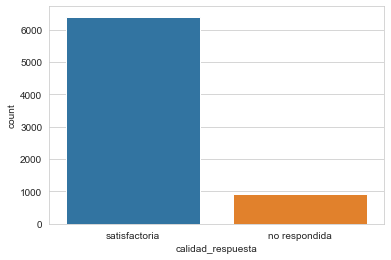

In [19]:
graph = sns.countplot(x="calidad_respuesta", data=df)

In [20]:
grouped = df.groupby('calidad_respuesta').count()[['folio']]
grouped = grouped.sort_values('calidad_respuesta', ascending=False)
grouped.style.format("{:,}")

,folio
calidad_respuesta,
satisfactoria,"6,400"
no respondida,935


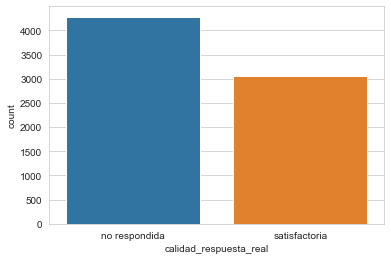

In [21]:
graph = sns.countplot(x="calidad_respuesta_real", data=df)

In [22]:
grouped = df.groupby('calidad_respuesta_real').count()[['folio']]
grouped = grouped.sort_values('calidad_respuesta_real', ascending=False)
grouped.style.format("{:,}")

,folio
calidad_respuesta_real,
satisfactoria,"3,052"
no respondida,"4,283"


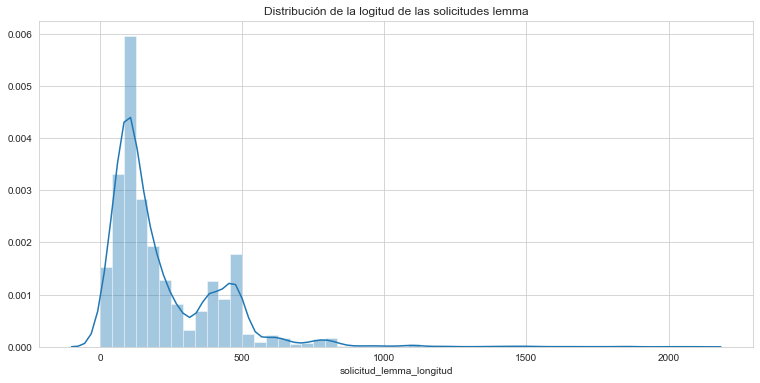

In [23]:
plt.figure(figsize=(12.8, 6))
sns.distplot(df['solicitud_lemma_longitud']).set_title('Distribución de la logitud de las solicitudes lemma');

In [24]:
df['solicitud_lemma_longitud'].describe()

count     7335
unique     718
top         92
freq       168
Name: solicitud_lemma_longitud, dtype: int64

In [25]:
filtro = df['solicitud_lemma_longitud'] < 16
cases = df[filtro]

In [26]:
len(cases)

106

In [27]:
df_new = df[df['descripcionsolicitud_lemma'].map(len) > 15]

In [28]:
df_new['solicitud_lemma_longitud'].describe()

count     7229
unique     705
top         92
freq       168
Name: solicitud_lemma_longitud, dtype: int64

In [29]:
grouped = df_new.groupby('calidad_respuesta_real').count()[['folio']]
grouped = grouped.sort_values('calidad_respuesta_real', ascending=False)
grouped.style.format("{:,}")

,folio
calidad_respuesta_real,
satisfactoria,"2,978"
no respondida,"4,251"


# Feature Engineering

**Codificamos etiquetas**

In [30]:
codigos = {
    'satisfactoria': 0,
    'no respondida': 1
}

In [31]:
df_new['codigo_calidad_respuesta_real'] = df_new['calidad_respuesta_real']
df_new = df_new.replace({'codigo_calidad_respuesta_real':codigos})

**train - test split**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_new['descripcionsolicitud_lemma'],
                                                   df_new['codigo_calidad_respuesta_real'],
                                                   test_size = 0.2,
                                                   random_state = 8)

**Representación de texto (TF-IDF Vectors)**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
ngram_range = (1, 2)
min_df = 10
max_df = 1.
max_features = 300

In [36]:
tfidf = TfidfVectorizer(encoding='utf-8',
                       ngram_range=ngram_range,
                       stop_words=None,
                       lowercase=False,
                       max_df=max_df,
                       min_df=min_df,
                       max_features=max_features,
                       norm='l2',
                       sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(5783, 300)
(1446, 300)


Aplicamos prueba chi cuadrada para ver que unigramas o bigramas estan mas correlacionados con cada label.

In [37]:
from sklearn.feature_selection import chi2
import numpy as np

In [38]:
for respuesta, codigo in sorted(codigos.items()):
    features_chi2 = chi2(features_train, labels_train == codigo)
    indices = np.argsort(features_chi2[0])
    features_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in features_names if len(v.split(' ')) == 1]
    bigrams = [v for v in features_names if len (v.split(' ')) == 2]
    print("# '{}' label:".format(respuesta))
    print("  . Most acorrelated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'no respondida' label:
  . Most acorrelated unigrams:
. basico
. inicial
. pieza
. existencia
. inventario
  . Most correlated bigrams:
. cuadrar basico
. pieza cuadrar

# 'satisfactoria' label:
  . Most acorrelated unigrams:
. basico
. inicial
. pieza
. existencia
. inventario
  . Most correlated bigrams:
. cuadrar basico
. pieza cuadrar



Guardamos pickles en S3

In [ ]:
bucket='inai-summerofdata'
key='mlpreproc/pickles_sample_year_dependencia/X_train.pkl'
pickle_byte_obj = pickle.dumps(X_train)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

In [ ]:
bucket='inai-summerofdata'
key='mlpreproc/pickles_sample_year_dependencia/X_test.pkl'
pickle_byte_obj = pickle.dumps(X_test)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

In [ ]:
bucket='inai-summerofdata'
key='mlpreproc/pickles_sample_year_dependencia/y_train.pkl'
pickle_byte_obj = pickle.dumps(y_train)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

In [ ]:
bucket='inai-summerofdata'
key='mlpreproc/pickles_sample_year_dependencia/y_test.pkl'
pickle_byte_obj = pickle.dumps(y_test)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

In [ ]:
bucket='inai-summerofdata'
key='mlpreproc/pickles_sample_year_dependencia/features_train.pkl'
pickle_byte_obj = pickle.dumps(features_train)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

In [ ]:
bucket='inai-summerofdata'
key='mlpreproc/pickles_sample_year_dependencia/labels_train.pkl'
pickle_byte_obj = pickle.dumps(labels_train)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

In [ ]:
bucket='inai-summerofdata'
key='mlpreproc/pickles_sample_year_dependencia/features_test.pkl'
pickle_byte_obj = pickle.dumps(features_test)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

In [ ]:
bucket='inai-summerofdata'
key='mlpreproc/pickles_sample_year_dependencia/labels_test.pkl'
pickle_byte_obj = pickle.dumps(labels_test)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

In [ ]:
bucket='inai-summerofdata'
key='mlpreproc/pickles_sample_year_dependencia/tfidf.pkl'
pickle_byte_obj = pickle.dumps(tfidf)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

In [ ]:
bucket='inai-summerofdata'
key='mlpreproc/pickles_sample_year_dependencia/df.pkl'
pickle_byte_obj = pickle.dumps(df_new)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)